<a href="https://colab.research.google.com/github/Grover1204/Eye-Gaze-Estimation/blob/main/Eye_Gaze_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install the Kaggle API Python package
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"grover009","key":"df213bc82f83cd181a0574088199381d"}'}

In [ ]:
!mkdir ~/.kaggle


!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                   Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           7728        249  1.0              
nagrajdesai/latest-10000-movies-dataset-from-tmdb                 Latest 10000 Movies Dataset from TMDB                1MB  2023-08-17 04:45:36            709         31  1.0              
talhabu/us-regional-sales-data                                    US Regional Sales Data                             195KB  2023-08-14 13:37:46            552         25  1.0              
nelgiriyewithana/countries-of-the-world-2023           

In [ ]:
!kaggle datasets download -d 4quant/eye-gaze

100% 4.46G/4.46G [02:51<00:00, 26.8MB/s]
100% 4.46G/4.46G [02:51<00:00, 28.0MB/s]


In [ ]:
! unzip eye-gaze.zip

Streaming output truncated to the last 5000 lines.
  inflating: original/p11/day16/0120.jpg  
  inflating: original/p11/day16/0121.jpg  
  inflating: original/p11/day16/0122.jpg  
  inflating: original/p11/day16/0123.jpg  
  inflating: original/p11/day16/0124.jpg  
  inflating: original/p11/day16/0125.jpg  
  inflating: original/p11/day16/0126.jpg  
  inflating: original/p11/day16/0127.jpg  
  inflating: original/p11/day16/0128.jpg  
  inflating: original/p11/day16/0129.jpg  
  inflating: original/p11/day16/0130.jpg  
  inflating: original/p11/day16/0131.jpg  
  inflating: original/p11/day16/0132.jpg  
  inflating: original/p11/day16/0133.jpg  
  inflating: original/p11/day16/0134.jpg  
  inflating: original/p11/day16/0135.jpg  
  inflating: original/p11/day16/0136.jpg  
  inflating: original/p11/day16/0137.jpg  
  inflating: original/p11/day16/0138.jpg  
  inflating: original/p11/day16/0139.jpg  
  inflating: original/p11/day16/0140.jpg  
  inflating: original/p11/day16/0141.jpg  
  i

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/gaze.csv')

In [ ]:
df.head()

Unnamed: 0                                        caruncle_2d  \
0           0  ['(215.0031, 192.4742, 8.8517)', '(215.7098, 1...   
1           1  ['(223.6765, 162.1306, 8.9962)', '(221.7880, 1...   
2           2  ['(205.6100, 177.0319, 9.2145)', '(202.6687, 1...   
3           3  ['(209.6651, 158.9221, 9.2303)', '(206.8911, 1...   
4           4  ['(208.2314, 161.6137, 9.1717)', '(204.2533, 1...   

                                         eye_details  \
0  {'look_vec': '(0.6431, -0.1524, -0.7504, 0.000...   
1  {'look_vec': '(0.2652, -0.2683, -0.9261, 0.000...   
2  {'look_vec': '(0.1989, 0.2961, -0.9342, 0.0000...   
3  {'look_vec': '(0.1647, -0.5925, -0.7885, 0.000...   
4  {'look_vec': '(-0.0701, 0.1484, -0.9864, 0.000...   

                                  eye_region_details  \
0  {'pca_shape_coeffs': ['0.0007733516', '-0.0437...   
1  {'pca_shape_coeffs': ['-0.02472504', '0.026948...   
2  {'pca_shape_coeffs': ['-0.02174765', '-0.00112...   
3  {'pca_shape_coeffs': ['-0.01105405', '-0.00522...   
4  {'pca_shape_coeffs': ['0.04512117', '0.0274486...   

                      head_pose  \
0  (343.9734, 203.3986, 0.0000)   
1   (15.2429, 202.4540, 0.0000)   
2  (352.7227, 176.4034, 0.0000)   
3   (11.3983, 190.6636, 0.0000)   
4   (17.7946, 187.9936, 0.0000)   

                                  interior_margin_2d  \
0  ['(227.0560, 193.6605, 8.9595)', '(226.1751, 1...   
1  ['(234.3076, 169.7990, 8.9854)', '(233.3026, 1...   
2  ['(211.9590, 187.5484, 9.2273)', '(208.9760, 1...   
3  ['(220.5346, 164.9280, 9.2361)', '(218.8153, 1...   
4  ['(220.2793, 174.3996, 9.1287)', '(216.4354, 1...   

                                             iris_2d  \
0  ['(269.4162, 189.3056, 8.8182)', '(271.0880, 1...   
1  ['(244.1168, 176.3059, 8.8628)', '(244.6292, 1...   
2  ['(239.0684, 207.9922, 8.8796)', '(239.3991, 2...   
3  ['(239.2941, 160.4984, 9.0569)', '(240.1653, 1...   
4  ['(225.7676, 200.2958, 8.9808)', '(226.4593, 2...   

                                    lighting_details  \
0  {'light_intensity': '1.185965', 'ambient_inten...   
1  {'light_intensity': '1.193954', 'ambient_inten...   
2  {'light_intensity': '0.9365342', 'ambient_inte...   
3  {'light_intensity': '0.8010478', 'ambient_inte...   
4  {'light_intensity': '0.784719', 'ambient_inten...   

                                                path  \
0  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
1  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
2  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
3  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
4  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   

                                          image_path  
0  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
1  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
2  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
3  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
4  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...

In [ ]:
len(df)

50000

In [ ]:
import pandas as pd

df = pd.read_csv('gaze.csv')
df.head()


Unnamed: 0                                        caruncle_2d  \
0           0  ['(215.0031, 192.4742, 8.8517)', '(215.7098, 1...   
1           1  ['(223.6765, 162.1306, 8.9962)', '(221.7880, 1...   
2           2  ['(205.6100, 177.0319, 9.2145)', '(202.6687, 1...   
3           3  ['(209.6651, 158.9221, 9.2303)', '(206.8911, 1...   
4           4  ['(208.2314, 161.6137, 9.1717)', '(204.2533, 1...   

                                         eye_details  \
0  {'look_vec': '(0.6431, -0.1524, -0.7504, 0.000...   
1  {'look_vec': '(0.2652, -0.2683, -0.9261, 0.000...   
2  {'look_vec': '(0.1989, 0.2961, -0.9342, 0.0000...   
3  {'look_vec': '(0.1647, -0.5925, -0.7885, 0.000...   
4  {'look_vec': '(-0.0701, 0.1484, -0.9864, 0.000...   

                                  eye_region_details  \
0  {'pca_shape_coeffs': ['0.0007733516', '-0.0437...   
1  {'pca_shape_coeffs': ['-0.02472504', '0.026948...   
2  {'pca_shape_coeffs': ['-0.02174765', '-0.00112...   
3  {'pca_shape_coeffs': ['-0.01105405', '-0.00522...   
4  {'pca_shape_coeffs': ['0.04512117', '0.0274486...   

                      head_pose  \
0  (343.9734, 203.3986, 0.0000)   
1   (15.2429, 202.4540, 0.0000)   
2  (352.7227, 176.4034, 0.0000)   
3   (11.3983, 190.6636, 0.0000)   
4   (17.7946, 187.9936, 0.0000)   

                                  interior_margin_2d  \
0  ['(227.0560, 193.6605, 8.9595)', '(226.1751, 1...   
1  ['(234.3076, 169.7990, 8.9854)', '(233.3026, 1...   
2  ['(211.9590, 187.5484, 9.2273)', '(208.9760, 1...   
3  ['(220.5346, 164.9280, 9.2361)', '(218.8153, 1...   
4  ['(220.2793, 174.3996, 9.1287)', '(216.4354, 1...   

                                             iris_2d  \
0  ['(269.4162, 189.3056, 8.8182)', '(271.0880, 1...   
1  ['(244.1168, 176.3059, 8.8628)', '(244.6292, 1...   
2  ['(239.0684, 207.9922, 8.8796)', '(239.3991, 2...   
3  ['(239.2941, 160.4984, 9.0569)', '(240.1653, 1...   
4  ['(225.7676, 200.2958, 8.9808)', '(226.4593, 2...   

                                    lighting_details  \
0  {'light_intensity': '1.185965', 'ambient_inten...   
1  {'light_intensity': '1.193954', 'ambient_inten...   
2  {'light_intensity': '0.9365342', 'ambient_inte...   
3  {'light_intensity': '0.8010478', 'ambient_inte...   
4  {'light_intensity': '0.784719', 'ambient_inten...   

                                                path  \
0  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
1  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
2  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
3  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
4  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   

                                          image_path  
0  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
1  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
2  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
3  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
4  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...

In [ ]:
import json

with open('gaze.json', 'r') as file:
    data = json.load(file)

data

{'caruncle_2d': {'0': ['(215.0031, 192.4742, 8.8517)',
   '(215.7098, 198.7790, 8.9220)',
   '(218.2289, 199.8089, 8.9291)',
   '(206.5326, 202.7618, 8.8062)',
   '(207.0680, 200.1248, 8.8324)',
   '(204.7977, 199.1230, 8.7407)',
   '(204.3005, 203.9268, 8.7143)'],
  '1': ['(223.6765, 162.1306, 8.9962)',
   '(221.7880, 166.7997, 8.9936)',
   '(219.1187, 169.0978, 8.9347)',
   '(212.2020, 164.0586, 8.8368)',
   '(214.2369, 162.9324, 8.8932)',
   '(213.6956, 159.6272, 8.8848)',
   '(209.9929, 160.6398, 8.8299)'],
  '2': ['(205.6100, 177.0319, 9.2145)',
   '(202.6687, 181.4165, 9.3002)',
   '(201.3873, 188.5052, 9.2656)',
   '(195.1520, 182.6315, 9.2281)',
   '(196.5371, 180.1527, 9.2259)',
   '(196.8546, 178.1698, 9.1534)',
   '(194.4122, 179.4723, 9.1695)'],
  '3': ['(209.6651, 158.9221, 9.2303)',
   '(206.8911, 167.1358, 9.2324)',
   '(205.9107, 168.0480, 9.2049)',
   '(196.1766, 165.5607, 9.1413)',
   '(198.1069, 164.9294, 9.1870)',
   '(198.0969, 161.8315, 9.1761)',
   '(195.9927, 16

In [ ]:
import h5py

with h5py.File('gaze.h5', 'r') as file:
    keys = list(file.keys())

keys


['image', 'look_vec', 'path']

In [ ]:
import os

files_in_directory = os.listdir('MPIIGaze')
files_in_directory


['Annotation Subset',
 '6 points-based face model.mat',
 'Data',
 'ReadMe.txt',
 'Evaluation Subset']

Data Exploring

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('gaze.csv')

# Display the first few rows to understand its structure
df_head = df.head()
df_head


Unnamed: 0                                        caruncle_2d  \
0           0  ['(215.0031, 192.4742, 8.8517)', '(215.7098, 1...   
1           1  ['(223.6765, 162.1306, 8.9962)', '(221.7880, 1...   
2           2  ['(205.6100, 177.0319, 9.2145)', '(202.6687, 1...   
3           3  ['(209.6651, 158.9221, 9.2303)', '(206.8911, 1...   
4           4  ['(208.2314, 161.6137, 9.1717)', '(204.2533, 1...   

                                         eye_details  \
0  {'look_vec': '(0.6431, -0.1524, -0.7504, 0.000...   
1  {'look_vec': '(0.2652, -0.2683, -0.9261, 0.000...   
2  {'look_vec': '(0.1989, 0.2961, -0.9342, 0.0000...   
3  {'look_vec': '(0.1647, -0.5925, -0.7885, 0.000...   
4  {'look_vec': '(-0.0701, 0.1484, -0.9864, 0.000...   

                                  eye_region_details  \
0  {'pca_shape_coeffs': ['0.0007733516', '-0.0437...   
1  {'pca_shape_coeffs': ['-0.02472504', '0.026948...   
2  {'pca_shape_coeffs': ['-0.02174765', '-0.00112...   
3  {'pca_shape_coeffs': ['-0.01105405', '-0.00522...   
4  {'pca_shape_coeffs': ['0.04512117', '0.0274486...   

                      head_pose  \
0  (343.9734, 203.3986, 0.0000)   
1   (15.2429, 202.4540, 0.0000)   
2  (352.7227, 176.4034, 0.0000)   
3   (11.3983, 190.6636, 0.0000)   
4   (17.7946, 187.9936, 0.0000)   

                                  interior_margin_2d  \
0  ['(227.0560, 193.6605, 8.9595)', '(226.1751, 1...   
1  ['(234.3076, 169.7990, 8.9854)', '(233.3026, 1...   
2  ['(211.9590, 187.5484, 9.2273)', '(208.9760, 1...   
3  ['(220.5346, 164.9280, 9.2361)', '(218.8153, 1...   
4  ['(220.2793, 174.3996, 9.1287)', '(216.4354, 1...   

                                             iris_2d  \
0  ['(269.4162, 189.3056, 8.8182)', '(271.0880, 1...   
1  ['(244.1168, 176.3059, 8.8628)', '(244.6292, 1...   
2  ['(239.0684, 207.9922, 8.8796)', '(239.3991, 2...   
3  ['(239.2941, 160.4984, 9.0569)', '(240.1653, 1...   
4  ['(225.7676, 200.2958, 8.9808)', '(226.4593, 2...   

                                    lighting_details  \
0  {'light_intensity': '1.185965', 'ambient_inten...   
1  {'light_intensity': '1.193954', 'ambient_inten...   
2  {'light_intensity': '0.9365342', 'ambient_inte...   
3  {'light_intensity': '0.8010478', 'ambient_inte...   
4  {'light_intensity': '0.784719', 'ambient_inten...   

                                                path  \
0  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
1  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
2  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
3  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   
4  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...   

                                          image_path  
0  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
1  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
2  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
3  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...  
4  ..\..\..\..\Downloads\UnityEyes_Windows\UnityE...

In [ ]:
import json

# Load the JSON data
with open('gaze.json', 'r') as file:
    json_data = json.load(file)

# Display the keys to understand its structure
json_keys = json_data.keys()
json_keys


dict_keys(['caruncle_2d', 'eye_details', 'eye_region_details', 'head_pose', 'interior_margin_2d', 'iris_2d', 'lighting_details', 'path', 'image_path'])

In [ ]:
import h5py

# Open the HDF5 file and check the type of the "image" entry
with h5py.File('gaze.h5', 'r') as file:
    hdf5_keys = list(file.keys())
    image_entry_type = type(file['image'])

hdf5_keys, image_entry_type

(['image', 'look_vec', 'path'], h5py._hl.group.Group)

In [ ]:
import h5py

# Open the HDF5 file and list the contents of the "image" group
with h5py.File('gaze.h5', 'r') as file:
    image_group_keys = list(file['image'].keys())

image_group_keys


['..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\1.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\100.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\1000.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10000.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10001.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10002.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10003.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10004.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10005.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10006.jpg',
 '..\\..\\..\\..\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs\\10

In [ ]:

# List the contents of the MPIIGaze directory as an example
mpiigaze_contents = os.listdir('MPIIGaze')
mpiigaze_contents


['Annotation Subset',
 '6 points-based face model.mat',
 'Data',
 'ReadMe.txt',
 'Evaluation Subset']

In [ ]:

# List the contents of the MPIIGaze directory as an example
mpiigaze_2 = os.listdir('/content/mpiigaze')
mpiigaze_2


['Annotation Subset', 'Data', 'ReadMe.txt', 'Evaluation Subset']

In [ ]:
def load_images_from_directory(directory_path):
    """
    Load all images from a specified directory into a list.

    Args:
    - directory_path (str): Path to the directory containing images.

    Returns:
    - List of PIL Image objects.
    """
    # Allowed image extensions
    allowed_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff']

    # Filter files based on allowed extensions
    image_files = [f for f in os.listdir(directory_path)
                   if os.path.isfile(os.path.join(directory_path, f))
                   and os.path.splitext(f)[1].lower() in allowed_extensions]

    images = [Image.open(os.path.join(directory_path, image_file)) for image_file in image_files]

    return images

def load_images_from_subdirectories(main_directory):
    """
    Load all images from specified subdirectories of the main directory.

    Args:
    - main_directory (str): Path to the main directory containing subdirectories.

    Returns:
    - List of PIL Image objects.
    """
    all_images = []

    # Loop through day01 to day31
    for day in range(1, 39):
        subdirectory_name = f"day{day:02}"  # Formats day as "day01", "day02", etc.
        subdirectory_path = os.path.join(main_directory, subdirectory_name)

        # Check if subdirectory exists
        if os.path.exists(subdirectory_path):
            images_in_subdirectory = load_images_from_directory(subdirectory_path)
            all_images.extend(images_in_subdirectory)

    return all_images

# The directory paths provided are specific to your environment,
# so running the code here will raise an error due to the paths not existing on this platform.
# You can run this code in your environment where the paths exist.
# Uncomment the lines below to run in your environment.

all_directories = [f"/content/original/p{i:02}" for i in range(3)]  # This will create ['/content/original/p00', '/content/original/p01', '/content/original/p02']

all_images = []

for directory in all_directories:
    images_from_current_dir = load_images_from_subdirectories(directory)
    all_images.extend(images_from_current_dir)

len(all_images)


In [ ]:
import random
import matplotlib.pyplot as plt

# Randomly sample 10 images
sample_images = random.sample(all_images, 4)

# Plot the 10 random images
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

for ax, img in zip(axes.ravel(), sample_images):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
nomalization = os.listdir('/content/normalized')
nomalization


['p11',
 'p09',
 'p04',
 'p13',
 'p05',
 'p08',
 'p06',
 'p12',
 'p07',
 'p01',
 'p14',
 'p03',
 'p00',
 'p10',
 'p02']

In [ ]:
from PIL import Image

# Define the path to the first image in the p00 folder
p00_subfolders = os.listdir('/content/original/p00')
first_image_path = os.path.join('/content/original/p00', p00_subfolders[0], os.listdir(os.path.join('/content/original/p01', p00_subfolders[10]))[10])

# Load and display the image
sample_image = Image.open(first_image_path)
sample_image.show()


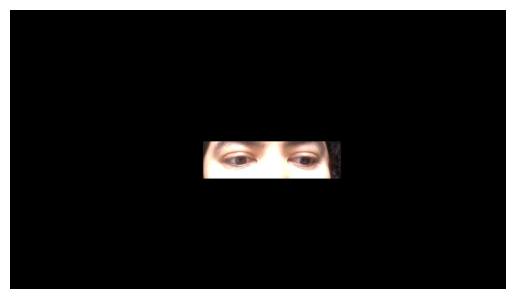

In [ ]:
import matplotlib.pyplot as plt

# Display the sample image using matplotlib
plt.imshow(sample_image)
plt.axis('off')  # Hide the axis values
plt.show()

In [ ]:
def load_images_from_directory(directory_path):
    """
    Load all images from a specified directory into a list.

    Args:
    - directory_path (str): Path to the directory containing images.

    Returns:
    - List of PIL Image objects.
    """
    # Allowed image extensions
    allowed_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff']

    # Filter files based on allowed extensions
    image_files = [f for f in os.listdir(directory_path)
                   if os.path.isfile(os.path.join(directory_path, f))
                   and os.path.splitext(f)[1].lower() in allowed_extensions]

    images = [Image.open(os.path.join(directory_path, image_file)) for image_file in image_files]

    return images

def load_images_from_subdirectories(main_directory):
    """
    Load all images from specified subdirectories of the main directory.

    Args:
    - main_directory (str): Path to the main directory containing subdirectories.

    Returns:
    - List of PIL Image objects.
    """
    all_images = []

    # Loop through day01 to day31
    for day in range(1, 39):
        subdirectory_name = f"day{day:02}"  # Formats day as "day01", "day02", etc.
        subdirectory_path = os.path.join(main_directory, subdirectory_name)

        # Check if subdirectory exists
        if os.path.exists(subdirectory_path):
            images_in_subdirectory = load_images_from_directory(subdirectory_path)
            all_images.extend(images_in_subdirectory)

    return all_images

# The directory paths provided are specific to your environment,
# so running the code here will raise an error due to the paths not existing on this platform.
# You can run this code in your environment where the paths exist.
# Uncomment the lines below to run in your environment.

all_directories = [f"/content/original/p{i:02}" for i in range(3)]  # This will create ['/content/original/p00', '/content/original/p01', '/content/original/p02']

all_images = []

for directory in all_directories:
    images_from_current_dir = load_images_from_subdirectories(directory)
    all_images.extend(images_from_current_dir)

len(all_images)


68973

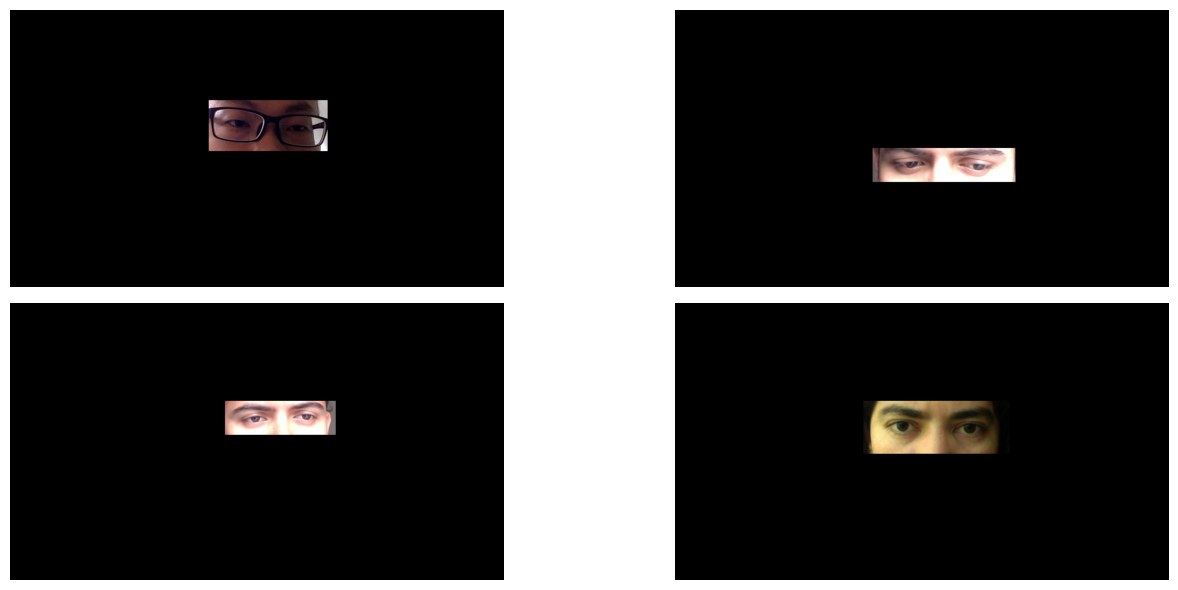

In [ ]:
import random
import matplotlib.pyplot as plt

# Randomly sample 10 images
sample_images = random.sample(all_images, 4)

# Plot the 10 random images
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

for ax, img in zip(axes.ravel(), sample_images):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


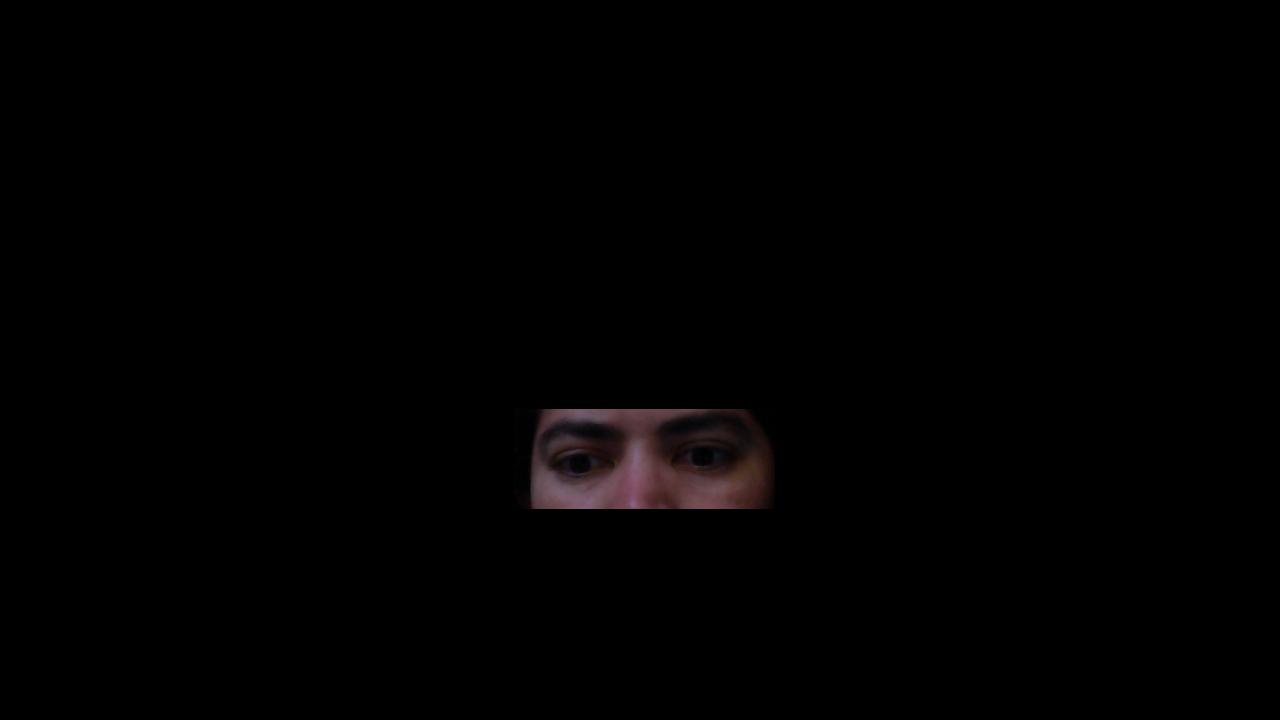

In [ ]:
all_images[1]

In [ ]:
from PIL import Image
import os
import random

BASE_PATH = "/content/MPIIGaze/Data/Original"
participants = ['p{:02d}'.format(i) for i in range(15)]

all_images = []
all_image_paths = []
selected_indices = []  # Store the indices of selected images

for participant in participants:
    participant_path = os.path.join(BASE_PATH, participant)
    day_folders = [d for d in os.listdir(participant_path) if d.startswith('day')]

    for day in day_folders:
        day_path = os.path.join(participant_path, day)
        image_files = [f for f in os.listdir(day_path) if f.endswith('.jpg')]

        indices = list(range(len(image_files)))
        random.shuffle(indices)
        selected = indices[:int(0.2 * len(indices))]

        for idx in selected:
            image_file = image_files[idx]
            image_path = os.path.join(day_path, image_file)
            image = Image.open(image_path)

            all_images.append(image)
            all_image_paths.append(image_path)
            selected_indices.append(idx)

print(f"Loaded {len(all_images)} images.")


Loaded 42595 images.


In [ ]:
import os
import scipy.io

BASE_PATH = "/content/MPIIGaze/Data/Normalized"
participants = ['p{:02d}'.format(i) for i in range(15)]

all_gaze_data = []

for participant in participants:
    participant_path = os.path.join(BASE_PATH, participant)
    day_files = [f for f in os.listdir(participant_path) if f.startswith('day') and f.endswith('.mat')]

    for day_file in day_files:
        day_path = os.path.join(participant_path, day_file)
        mat_data = scipy.io.loadmat(day_path)

        # Process the loaded mat_data as needed for your task
        # For example, you can access specific variables using mat_data['variable_name']
        # and organize the data into a suitable format

        all_gaze_data.append(mat_data)

print(f"Loaded {len(all_gaze_data)} .mat files.")


Loaded 521 .mat files.


In [ ]:
import scipy.io

# Load a single .mat file for exploration
sample_mat_file = all_gaze_data[0]

# Print the keys in the .mat file
print(sample_mat_file.keys())

# Once we know the keys, we can access the data we need.
# For demonstration purposes, let's assume there's a key called 'gaze' which contains the gaze data:
# gaze_data = sample_mat_file['gaze']

# However, the exact key will depend on the structure of your .mat files.

dict_keys(['__header__', '__version__', '__globals__', 'data', 'filenames'])


In [ ]:
# Explore the 'data' key
print("Data type:", type(sample_mat_file['data']))
print("Data shape:", sample_mat_file['data'].shape)

# Assuming 'data' is a numpy array or similar, print the first few entries
print("First few data entries:", sample_mat_file['data'][:5])

# Explore the 'filenames' key
print("Filenames type:", type(sample_mat_file['filenames']))
print("Filenames shape:", sample_mat_file['filenames'].shape)

# Print the first few filenames
print("First few filenames:", sample_mat_file['filenames'][:5])


Data type: <class 'numpy.ndarray'>
Data shape: (1, 1)
First few data entries: [[(array([[(array([[ 0.02043722,  0.15716701, -0.98736055],
                 [ 0.04301622,  0.02566337, -0.99874471],
                 [ 0.12880966,  0.18254736, -0.9747228 ],
                 ...,
                 [ 0.11192404,  0.17099133, -0.97889477],
                 [-0.09246777,  0.12611764, -0.98769634],
                 [ 0.189432  ,  0.15731845, -0.96920917]]), array([[[221, 227, 237, ..., 184, 204, 211],
                  [224, 232, 239, ..., 168, 184, 201],
                  [232, 237, 242, ..., 155, 178, 191],
                  ...,
                  [217, 213, 211, ..., 187, 195, 206],
                  [221, 218, 217, ..., 198, 209, 213],
                  [223, 221, 217, ..., 208, 215, 218]],

                 [[203, 206, 212, ..., 189, 194, 201],
                  [204, 214, 216, ..., 183, 198, 203],
                  [210, 220, 228, ..., 176, 186, 201],
                  ...,
               

In [ ]:
# Load a single .mat file for exploration
sample_mat_file = all_gaze_data[0]['data'][0][0]

# Print the dtype names in the data field
print(sample_mat_file.dtype.names)


('right', 'left')


In [ ]:
# Explore the 'right' subfield
right_subfield = sample_mat_file['right']
print("Right subfield type:", type(right_subfield))
print("Right subfield shape:", right_subfield.shape)
print("Right subfield dtype names:", right_subfield.dtype.names)

# Explore the 'left' subfield
left_subfield = sample_mat_file['left']
print("\nLeft subfield type:", type(left_subfield))
print("Left subfield shape:", left_subfield.shape)
print("Left subfield dtype names:", left_subfield.dtype.names)


Right subfield type: <class 'numpy.ndarray'>
Right subfield shape: (1, 1)
Right subfield dtype names: ('gaze', 'image', 'pose')

Left subfield type: <class 'numpy.ndarray'>
Left subfield shape: (1, 1)
Left subfield dtype names: ('gaze', 'image', 'pose')


In [ ]:
# Initialize lists to store gaze data, filenames, and eye (right or left)
all_gaze_vectors = []
all_filenames = []
all_eyes = []

for mat_file in all_gaze_data:
    # Extract gaze vectors, filenames, and eye type
    for eye in ['right', 'left']:
        gaze_vectors = mat_file['data'][0][0][eye]['gaze'][0][0]
        filenames = mat_file['filenames']

        # Flatten the gaze vectors and filenames
        flattened_gaze = [vec[0] for vec in gaze_vectors]
        flattened_filenames = [fname[0][0] for fname in filenames]

        all_gaze_vectors.extend(flattened_gaze)
        all_filenames.extend(flattened_filenames)
        all_eyes.extend([eye] * len(flattened_gaze))

print("Extracted gaze data for", len(all_gaze_vectors), "images.")


Extracted gaze data for 427316 images.


In [ ]:
# Step 1: Create a dictionary with filenames as keys and gaze vectors as values
gaze_dict = {filename: gaze for filename, gaze in zip(all_filenames, all_gaze_vectors)}

# Lists to store paired image paths and gaze vectors
paired_image_paths = []
paired_gaze_vectors = []

# Step 2: Loop through processed image paths and pair with gaze vectors
for image_path in all_image_paths:
    # Extract the filename from the image path
    filename = os.path.basename(image_path)

    # Match the filename with the gaze dictionary
    if filename in gaze_dict:
        paired_image_paths.append(image_path)
        paired_gaze_vectors.append(gaze_dict[filename])
    # Account for augmented images (if you have changed their filenames during augmentation)
    # For example, for rotated images:
    elif "rotated_10_" + filename in gaze_dict:
        paired_image_paths.append(image_path)
        paired_gaze_vectors.append(gaze_dict["rotated_10_" + filename])
    elif "rotated_minus_10_" + filename in gaze_dict:
        paired_image_paths.append(image_path)
        paired_gaze_vectors.append(gaze_dict["rotated_minus_10_" + filename])
    elif "mirrored_" + filename in gaze_dict:
        paired_image_paths.append(image_path)
        paired_gaze_vectors.append(gaze_dict["mirrored_" + filename])

print(f"Paired {len(paired_image_paths)} images with their gaze vectors.")


Paired 42595 images with their gaze vectors.


In [ ]:
import os
from PIL import ImageEnhance, ImageOps

TARGET_SIZE = (224, 224)
BATCH_SIZE = 500
TEMP_DIR = "/content/processed_images"

# Ensure the temporary directory exists
if not os.path.exists(TEMP_DIR):
    os.makedirs(TEMP_DIR)

def process_and_save_batch(image_paths, start_index):
    for idx, image_path in enumerate(image_paths):
        img = Image.open(image_path)

        # Resize
        img = img.resize(TARGET_SIZE)

        # Normalize
        np_img = np.array(img) / 255.0
        img = Image.fromarray((np_img * 255).astype(np.uint8))

        # Save the processed image
        img.save(os.path.join(TEMP_DIR, f"processed_{start_index + idx}.jpg"))

        # Augment and save
        img.rotate(10).save(os.path.join(TEMP_DIR, f"rotated_10_{start_index + idx}.jpg"))
        img.rotate(-10).save(os.path.join(TEMP_DIR, f"rotated_minus_10_{start_index + idx}.jpg"))
        ImageOps.mirror(img).save(os.path.join(TEMP_DIR, f"mirrored_{start_index + idx}.jpg"))

# Process and save images in batches
for i in range(0, len(all_image_paths), BATCH_SIZE):
    process_and_save_batch(all_image_paths[i:i+BATCH_SIZE], i)

print(f"Processed and saved images to {TEMP_DIR}.")


In [ ]:
from PIL import Image
import os

# Directory where processed images are saved
DIR_PATH = "/content/processed_images"

# List to store loaded images
loaded_images = []

# List to store image paths (optional, but can be useful)
loaded_image_paths = []

# Load images from the directory
for image_file in os.listdir(DIR_PATH):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(DIR_PATH, image_file)
        img = Image.open(image_path)
        loaded_images.append(img)
        loaded_image_paths.append(image_path)

print(f"Loaded {len(loaded_images)} images from {DIR_PATH}.")


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% temporary (which will be further split into validation and test sets)
train_image_paths, temp_image_paths, train_gaze_vectors, temp_gaze_vectors = train_test_split(
    paired_image_paths, paired_gaze_vectors, test_size=0.3, random_state=42
)

# Split the temporary set into validation and test sets (50% each of the temp set)
val_image_paths, test_image_paths, val_gaze_vectors, test_gaze_vectors = train_test_split(
    temp_image_paths, temp_gaze_vectors, test_size=0.5, random_state=42
)

print(f"Training set size: {len(train_image_paths)} images")
print(f"Validation set size: {len(val_image_paths)} images")
print(f"Test set size: {len(test_image_paths)} images")


Training set size: 29816 images
Validation set size: 6389 images
Test set size: 6390 images


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% temporary (which will be further split into validation and test sets)
train_image_paths, temp_image_paths, train_gaze_vectors, temp_gaze_vectors = train_test_split(
    paired_image_paths, paired_gaze_vectors, test_size=0.3, random_state=42
)

# Split the temporary set into validation and test sets (50% each of the temp set)
val_image_paths, test_image_paths, val_gaze_vectors, test_gaze_vectors = train_test_split(
    temp_image_paths, temp_gaze_vectors, test_size=0.5, random_state=42
)

print(f"Training set size: {len(train_image_paths)} images")
print(f"Validation set size: {len(val_image_paths)} images")
print(f"Test set size: {len(test_image_paths)} images")

# Define the data generator
def data_generator(image_paths, gaze_vectors, batch_size):
    while True:
        # Randomly shuffle the indices
        idx = np.random.permutation(len(image_paths))
        num_batches = len(image_paths) // batch_size

        for batch_num in range(num_batches):
            batch_indices = idx[batch_size*batch_num : batch_size*(batch_num+1)]
            batch_image_paths = [image_paths[i] for i in batch_indices]
            batch_gaze_vectors = [gaze_vectors[i] for i in batch_indices]

            # Load and preprocess images
            X = np.array([np.array(Image.open(img_path).convert('L'), dtype=np.float32) / 255.0 for img_path in batch_image_paths])
            y = np.array(batch_gaze_vectors, dtype=np.float32)

            # Expand dimensions to match the input shape
            X = np.expand_dims(X, axis=-1)

            yield (X, y)

# Create data generators
batch_size = 32
train_gen = data_generator(train_image_paths, train_gaze_vectors, batch_size)
val_gen = data_generator(val_image_paths, val_gaze_vectors, batch_size)
test_gen = data_generator(test_image_paths, test_gaze_vectors, batch_size)

Training set size: 29816 images
Validation set size: 6389 images
Test set size: 6390 images


In [ ]:
# Define the model architecture (you can modify this as needed)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='linear'))  # Assuming gaze vector is a 2D vector

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error as the loss function for regression



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
!pip install pydot-ng


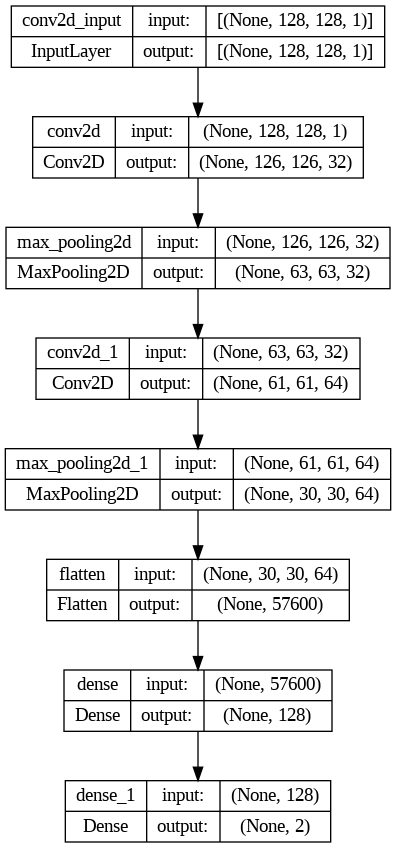

In [ ]:
# Plot the model summary
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_summary.png', show_shapes=True)

In [ ]:
import numpy as np

In [ ]:
history = model.fit(train_gen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=10,
                    validation_data=val_gen,
                    validation_steps=validation_steps)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% temporary (which will be further split into validation and test sets)
train_image_paths, temp_image_paths, train_gaze_vectors, temp_gaze_vectors = train_test_split(
    paired_image_paths, paired_gaze_vectors, test_size=0.3, random_state=42
)

# Split the temporary set into validation and test sets (50% each of the temp set)
val_image_paths, test_image_paths, val_gaze_vectors, test_gaze_vectors = train_test_split(
    temp_image_paths, temp_gaze_vectors, test_size=0.5, random_state=42
)

print(f"Training set size: {len(train_image_paths)} images")
print(f"Validation set size: {len(val_image_paths)} images")
print(f"Test set size: {len(test_image_paths)} images")

# Define the data generator
def data_generator(image_paths, gaze_vectors, batch_size):
    while True:
        # Randomly shuffle the indices
        idx = np.random.permutation(len(image_paths))
        num_batches = len(image_paths) // batch_size

        for batch_num in range(num_batches):
            batch_indices = idx[batch_size*batch_num : batch_size*(batch_num+1)]
            batch_image_paths = [image_paths[i] for i in batch_indices]
            batch_gaze_vectors = [gaze_vectors[i] for i in batch_indices]

            # Load and preprocess images
            X = np.array([np.array(Image.open(img_path).convert('L'), dtype=np.float32) / 255.0 for img_path in batch_image_paths])
            y = np.array(batch_gaze_vectors, dtype=np.float32)

            # Expand dimensions to match the input shape
            X = np.expand_dims(X, axis=-1)

            yield (X, y)

# Create data generators
batch_size = 32
train_gen = data_generator(train_image_paths, train_gaze_vectors, batch_size)
val_gen = data_generator(val_image_paths, val_gaze_vectors, batch_size)
test_gen = data_generator(test_image_paths, test_gaze_vectors, batch_size)

# Define the model architecture (you can modify this as needed)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='linear'))  # Assuming gaze vector is a 2D vector

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error as the loss function for regression

# Train the model
steps_per_epoch = len(train_image_paths) // batch_size
validation_steps = len(val_image_paths) // batch_size

history = model.fit(train_gen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=10,
                    validation_data=val_gen,
                    validation_steps=validation_steps)

# Evaluate the model on the test set
test_steps = len(test_image_paths) // batch_size
test_loss = model.evaluate(test_gen, steps=test_steps)
print(f"Test Loss: {test_loss}")


In [ ]:
from tensorflow.keras.utils import Sequence
from PIL import Image
import numpy as np

class GazeDataGenerator(Sequence):
    def __init__(self, image_paths, gaze_vectors, batch_size=32, shuffle=True):
        self.image_paths = image_paths
        self.gaze_vectors = gaze_vectors
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in indices]
        batch_gaze_vectors = [self.gaze_vectors[i] for i in indices]

        # Convert images to float32 and normalize to [0, 1]
        X = np.array([np.array(Image.open(img_path).convert('L'), dtype=np.float32) / 255.0 for img_path in batch_image_paths])
        y = np.array(batch_gaze_vectors)

        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)


In [ ]:
# Initialize data generators
train_generator = GazeDataGenerator(train_image_paths, train_gaze_vectors, batch_size=32)
val_generator = GazeDataGenerator(val_image_paths, val_gaze_vectors, batch_size=32)


In [ ]:
# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=3)

In [ ]:
test_generator = GazeDataGenerator(test_image_paths, test_gaze_vectors, batch_size=32, shuffle=False)
test_loss = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
def visualize_predictions(image_paths, true_gaze, predicted_gaze, num_samples=5):
    sample_indices = np.random.choice(len(image_paths), num_samples, replace=False)
    for index in sample_indices:
        img = Image.open(image_paths[index])
        plt.imshow(img, cmap='gray')
        plt.title(f"True Gaze: {true_gaze[index]}\nPredicted Gaze: {predicted_gaze[index]}")
        plt.show()

# Get predictions
predictions = model.predict(test_generator)

visualize_predictions(test_image_paths, test_gaze_vectors, predictions)


In [ ]:
# Save the entire model
model.save('gaze_prediction_model.h5')

# If you want to save only the weights
model.save_weights('gaze_prediction_weights.h5')

# If you want to save only the architecture
with open('gaze_prediction_architecture.json', 'w') as f:
    f.write(model.to_json())


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('gaze_prediction_model.h5')


# Overview
The notebook shows how to read and process the raw MPIIGaze contest data in order to build a simple predictive model for eye direction (or pupil location).

In [ ]:
%matplotlib inline
import os
from glob import glob
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from skimage.util.montage import montage2d
from skimage.io import imread
from scipy.io import loadmat # for loading mat files
from tqdm import tqdm_notebook
root_mpi_dir = os.path.join('..', 'input', 'mpiigaze')
data_dir = os.path.join(root_mpi_dir, 'Data')
annot_dir = os.path.join(root_mpi_dir, 'Annotation Subset') # annotations the important part of the data
img_dir = os.path.join(data_dir, 'Original')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(36, 60, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)  # Predicting 4 values for the look vector
])

model.compile(optimizer='adam', loss='mse')


In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


# Read the Annotations
We know the annotations We also annotated 10,848 images with 12 facial landmarks, face bounding box, two eye bounding boxes, and pupil position.

In [ ]:
def read_annot(in_path):
    r_dir = os.path.splitext(os.path.basename(in_path))[0]
    c_df = pd.read_table(in_path, header = None, sep = ' ')
    c_df.columns = ['path' if i<0 else ('x{}'.format(i//2) if i % 2 == 0 else 'y{}'.format(i//2)) for i, x in enumerate(c_df.columns, -1)]
    c_df['path'] = c_df['path'].map(lambda x: os.path.join(img_dir, r_dir, x))
    c_df['group'] = r_dir
    c_df['exists'] = c_df['path'].map(os.path.exists)
    return c_df
all_annot_df = pd.concat([read_annot(c_path) for c_path in glob(os.path.join(annot_dir, '*'))], ignore_index=True)
print(all_annot_df.shape[0], 'annotations')
print('Missing %2.2f%%' % (100-100*all_annot_df['exists'].mean()))
all_annot_df = all_annot_df[all_annot_df['exists']].drop('exists', 1)
all_annot_df.sample(3)

10654 annotations
Missing 80.00%


path   x0  ...     y7  group
277   ../input/mpiigaze/Data/Original/p11/day07/0041...  665  ...    457    p11
6444  ../input/mpiigaze/Data/Original/p10/day04/0018...  591  ...    229    p10
6861  ../input/mpiigaze/Data/Original/p10/day04/0045...  560  ...    264    p10

[3 rows x 18 columns]

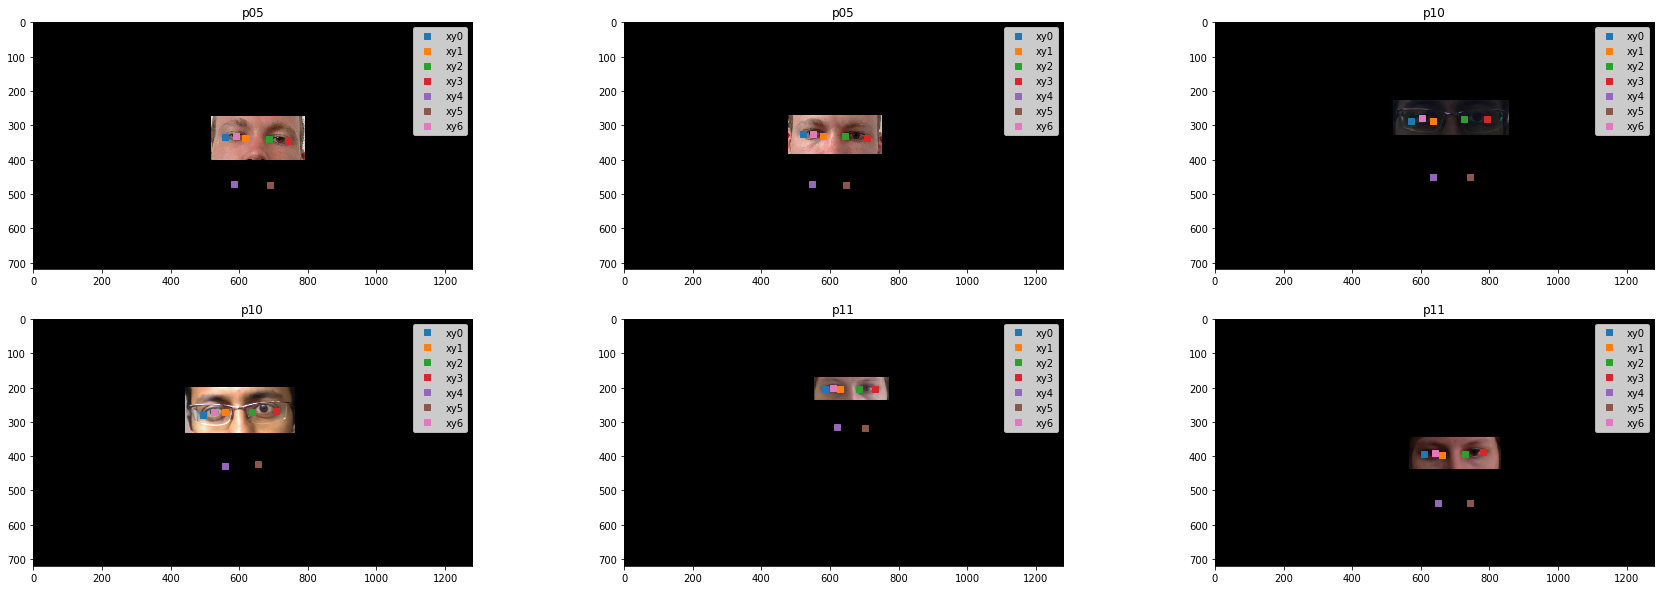

In [ ]:
group_view = all_annot_df.groupby('group').apply(lambda x: x.sample(2)).reset_index(drop = True)
fig, m_axs = plt.subplots(2, 3, figsize = (30, 10))
for (_, c_row), c_ax in zip(group_view.iterrows(), m_axs.flatten()):
    c_img = imread(c_row['path'])
    c_ax.imshow(c_img)
    for i in range(7):
        c_ax.plot(c_row['x{}'.format(i)], c_row['y{}'.format(i)], 's', label = 'xy{}'.format(i))
    c_ax.legend()
    c_ax.set_title('{group}'.format(**c_row))

# Making sense of the points
From this we can derive that (eyes are flipped)
- `xy0` is the left boundary of right eye
- `xy1` is the right boundary to the right eye
- `xy6` is the pupil location for the right eye
We ignore the other points for now

In [ ]:
from scipy.ndimage import zoom
def get_eyeball(in_row, eye_height = 30):
    c_img = imread(in_row['path'])
    min_x = int(in_row['x0'])
    max_x = int(in_row['x1'])

    mean_x = (min_x+max_x)/2
    wid_x = (max_x-min_x)
    zoom_factor = 55.0/wid_x

    mean_y = (in_row['y0']+in_row['y1'])/2
    eye_height = 1/zoom_factor*35
    # normalized pupil position
    pup_v = 2*zoom_factor*(in_row['x6']-mean_x)/wid_x, 2*zoom_factor*(in_row['y6']-mean_y)/eye_height

    min_y = int(mean_y-eye_height//2)
    max_y = int(mean_y+eye_height//2)
    out_img = c_img[min_y:max_y, min_x:max_x]
    rs_img = zoom(out_img, (zoom_factor, zoom_factor, 1))
    return rs_img, pup_v

/opt/conda/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


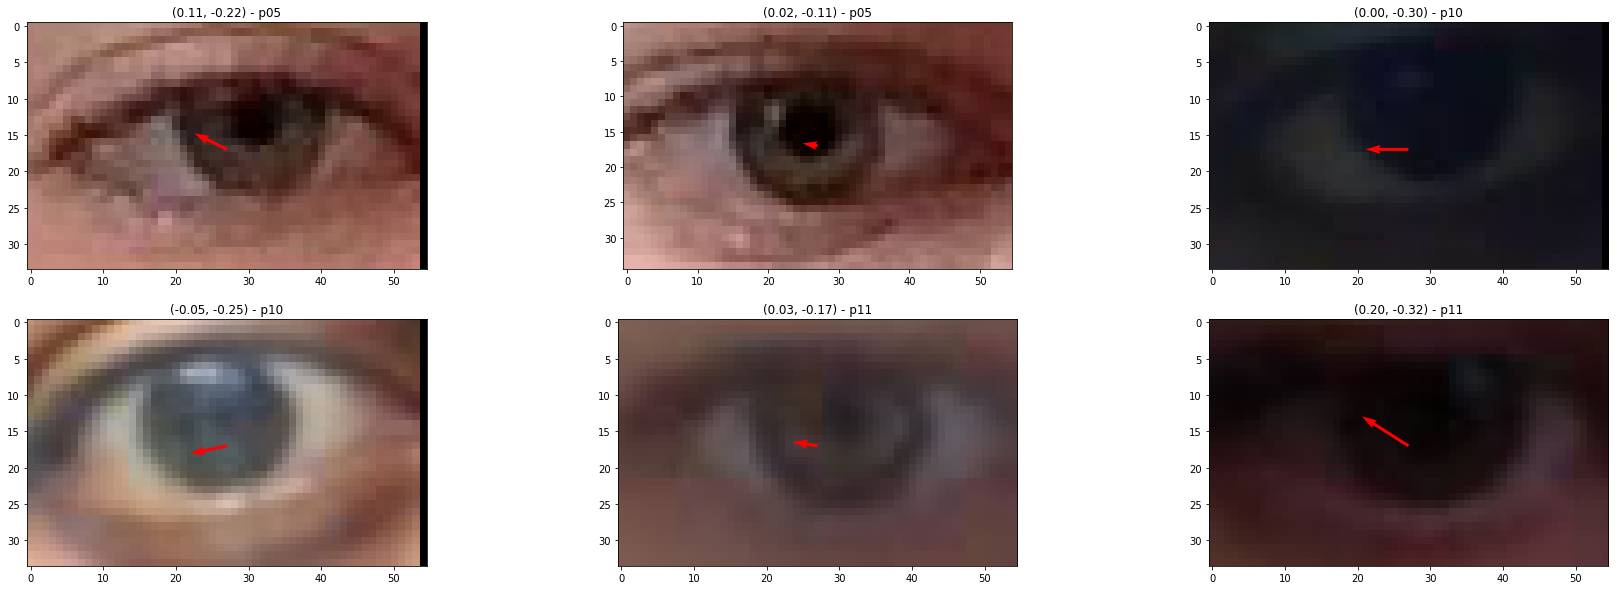

In [ ]:
fig, m_axs = plt.subplots(2, 3, figsize = (30, 10))
for (_, c_row), c_ax in zip(group_view.iterrows(), m_axs.flatten()):
    c_img, c_vec = get_eyeball(c_row)
    c_ax.imshow(c_img)
    c_ax.quiver([55//2], [35//2], 20*c_vec[1], 20*c_vec[0], units = 'xy', scale = 1, color = 'red')
    c_ax.set_title('({0:2.2f}, {1:2.2f}) - {group}'.format(*c_vec, **c_row))

In [ ]:
all_annot_df['eyeball'] = all_annot_df.apply(get_eyeball, 1)
all_annot_df['pupil_x'] = all_annot_df['eyeball'].map(lambda x: x[1][0])
all_annot_df['pupil_y'] = all_annot_df['eyeball'].map(lambda x: x[1][1])
all_annot_df['eyeball'] = all_annot_df['eyeball'].map(lambda x: x[0])
all_annot_df.sample(3)

/opt/conda/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


path    ...      pupil_y
307   ../input/mpiigaze/Data/Original/p11/day04/0081...    ...    -0.105504
6385  ../input/mpiigaze/Data/Original/p10/day16/0308...    ...    -0.264577
677   ../input/mpiigaze/Data/Original/p05/day08/0088...    ...    -0.023227

[3 rows x 21 columns]

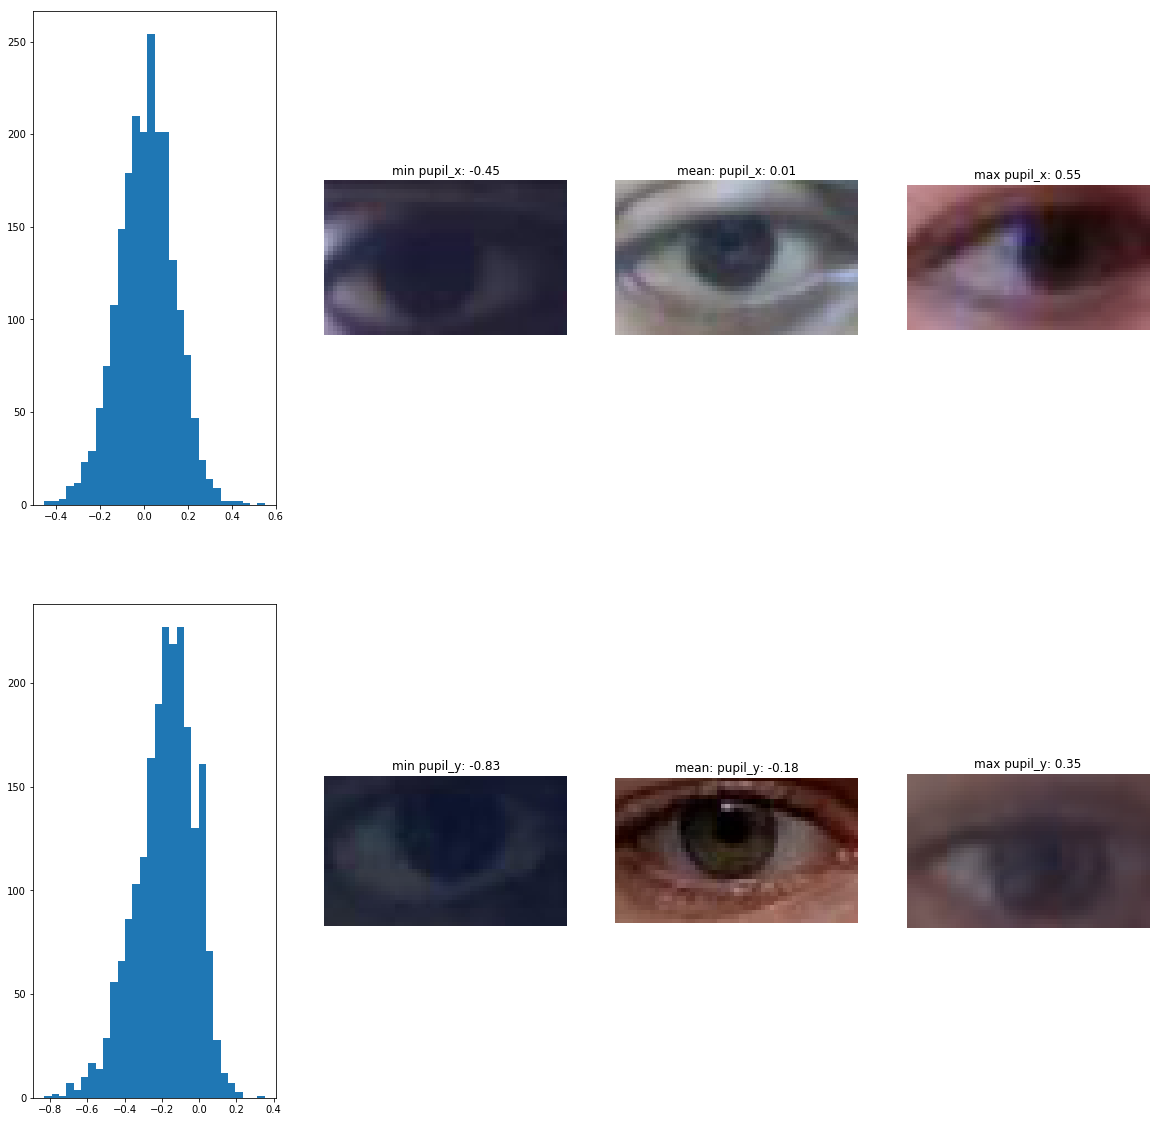

In [ ]:
fig, m_axs = plt.subplots(2, 4, figsize = (20, 20))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
from itertools import product
for (ax_dist, ax_min, ax_mean, ax_max), n_ax in zip(m_axs, ['pupil_x', 'pupil_y']):
    # use random sampling to get a better feeling
    c_vec = all_annot_df[n_ax]
    ax_dist.hist(c_vec.values, 30)
    ax_dist.axis('on')
    j = c_vec.idxmin()
    ax_min.imshow(all_annot_df.loc[j]['eyeball'])
    ax_min.set_title('min {}: {:2.2f}'.format(n_ax, all_annot_df.loc[j][n_ax]))

    k = c_vec.idxmax()
    ax_max.imshow(all_annot_df.loc[k]['eyeball'])
    ax_max.set_title('max {}: {:2.2f}'.format(n_ax, all_annot_df.loc[k][n_ax]))

    p = np.abs(c_vec-np.mean(c_vec)).idxmin()
    ax_mean.imshow(all_annot_df.loc[p]['eyeball'])
    ax_mean.set_title('mean: {}: {:2.2f}'.format(n_ax, all_annot_df.loc[p][n_ax]))

# Read the Normalized Data
Here we load the .mat data which as it is a Matlab file a bit messy to read in Python but with scipy and a little determination we can figure it out

In [ ]:
def parse_mat(in_path):
    in_dat = loadmat(in_path, squeeze_me = True, struct_as_record = True)
    vec1_load, img_load,vec2_load = in_dat['data'].tolist()[1].tolist()
    return vec1_load, img_load, vec2_load
def mat_to_df(in_path):
    vec1_load, img_load, vec2_load = parse_mat(in_path)
    c_df = pd.DataFrame(dict(img=[x for x in img_load],
                             vec1=[x for x in vec1_load],
                            vec2=[x for x in vec2_load]))
    c_df['group'] = os.path.basename(os.path.dirname(in_path))
    c_df['day'] = os.path.splitext(os.path.basename(in_path))[0]
    return c_df
def safe_mat_to_df(in_path):
    try:
        return mat_to_df(in_path)
    except ValueError as e:
        print('ValueError', e, in_path)
        return None
mat_files = glob(os.path.join(root_mpi_dir, '..', 'normalized', '*', '*.mat'))
print(len(mat_files), 'normalized files found')

521 normalized files found


In [ ]:
all_norm_df = pd.concat([safe_mat_to_df(in_path) for in_path in tqdm_notebook(mat_files)], ignore_index=True)
all_norm_df.sample(3)

A Jupyter Widget

ValueError arrays must all be same length ../input/mpiigaze/../normalized/p01/day69.mat
ValueError arrays must all be same length ../input/mpiigaze/../normalized/p01/day39.mat



img  ...      day
79275   [[122, 122, 145, 169, 179, 179, 203, 231, 233,...  ...    day08
42554   [[100, 100, 127, 145, 158, 166, 179, 158, 166,...  ...    day12
144980  [[67, 62, 59, 56, 50, 44, 40, 46, 56, 44, 44, ...  ...    day16

[3 rows x 5 columns]

213656 images loaded


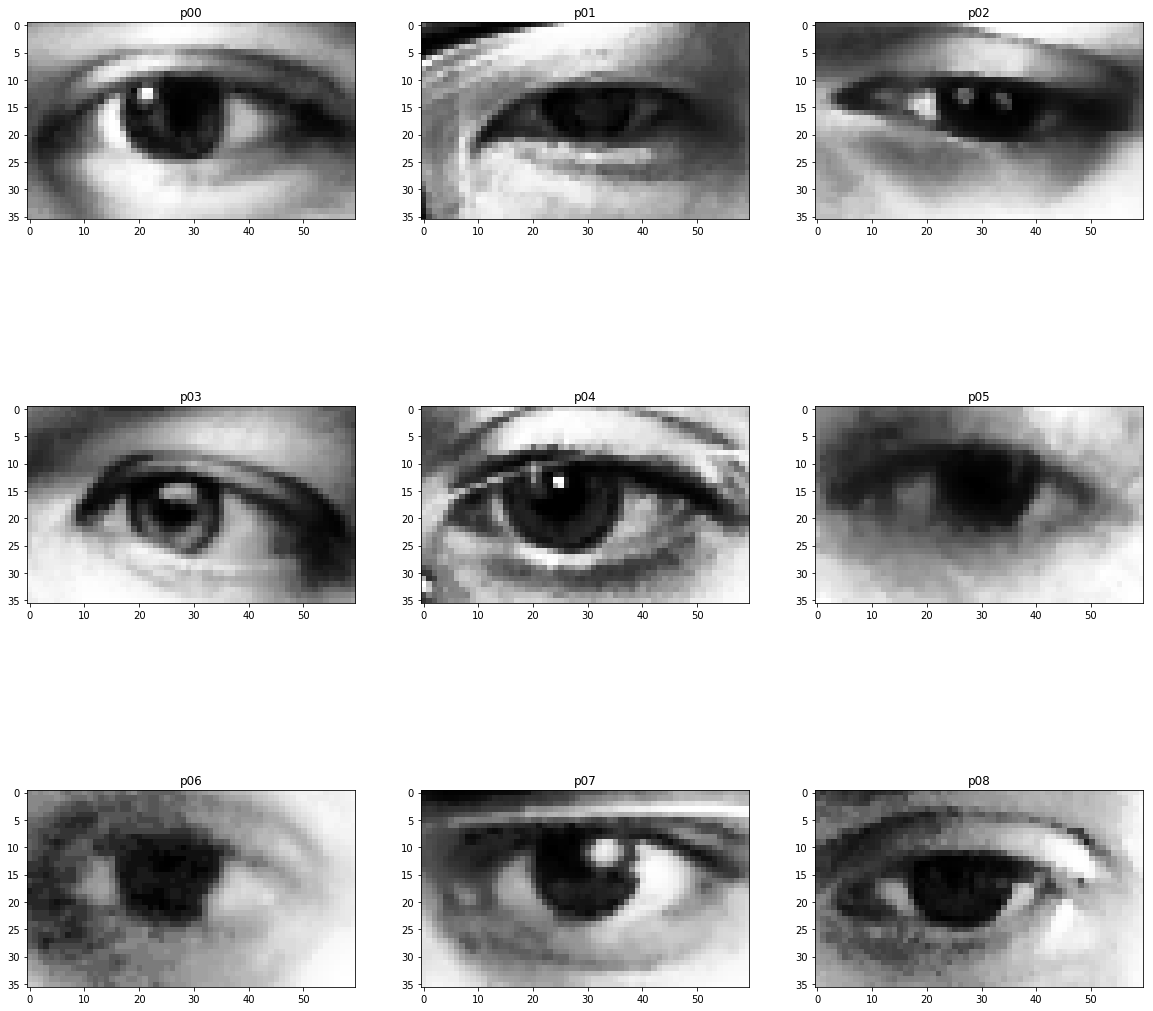

In [ ]:
print(all_norm_df.shape[0], 'images loaded')
group_view = all_norm_df.groupby('group').apply(lambda x: x.sample(1)).reset_index(drop = True)
fig, m_axs = plt.subplots(3, 3, figsize = (20, 20))
for (_, c_row), c_ax in zip(group_view.iterrows(), m_axs.flatten()):
    c_ax.imshow(c_row['img'], cmap = 'gray')
    c_ax.legend()
    c_ax.set_title('{group}'.format(**c_row))

In [ ]:
for v in ['vec1', 'vec2']:
    for i, x_dim in enumerate('xyz'):
        all_norm_df['{}_{}'.format(v, x_dim)] = all_norm_df[v].map(lambda x: x[i])
all_norm_df.sample(3)

img    ...       vec2_z
88116  [[148, 145, 138, 133, 131, 120, 112, 105, 101,...    ...     0.006366
14482  [[200, 184, 189, 195, 184, 176, 176, 176, 176,...    ...     0.000069
18737  [[183, 183, 140, 123, 145, 123, 95, 116, 116, ...    ...    -0.010046

[3 rows x 11 columns]

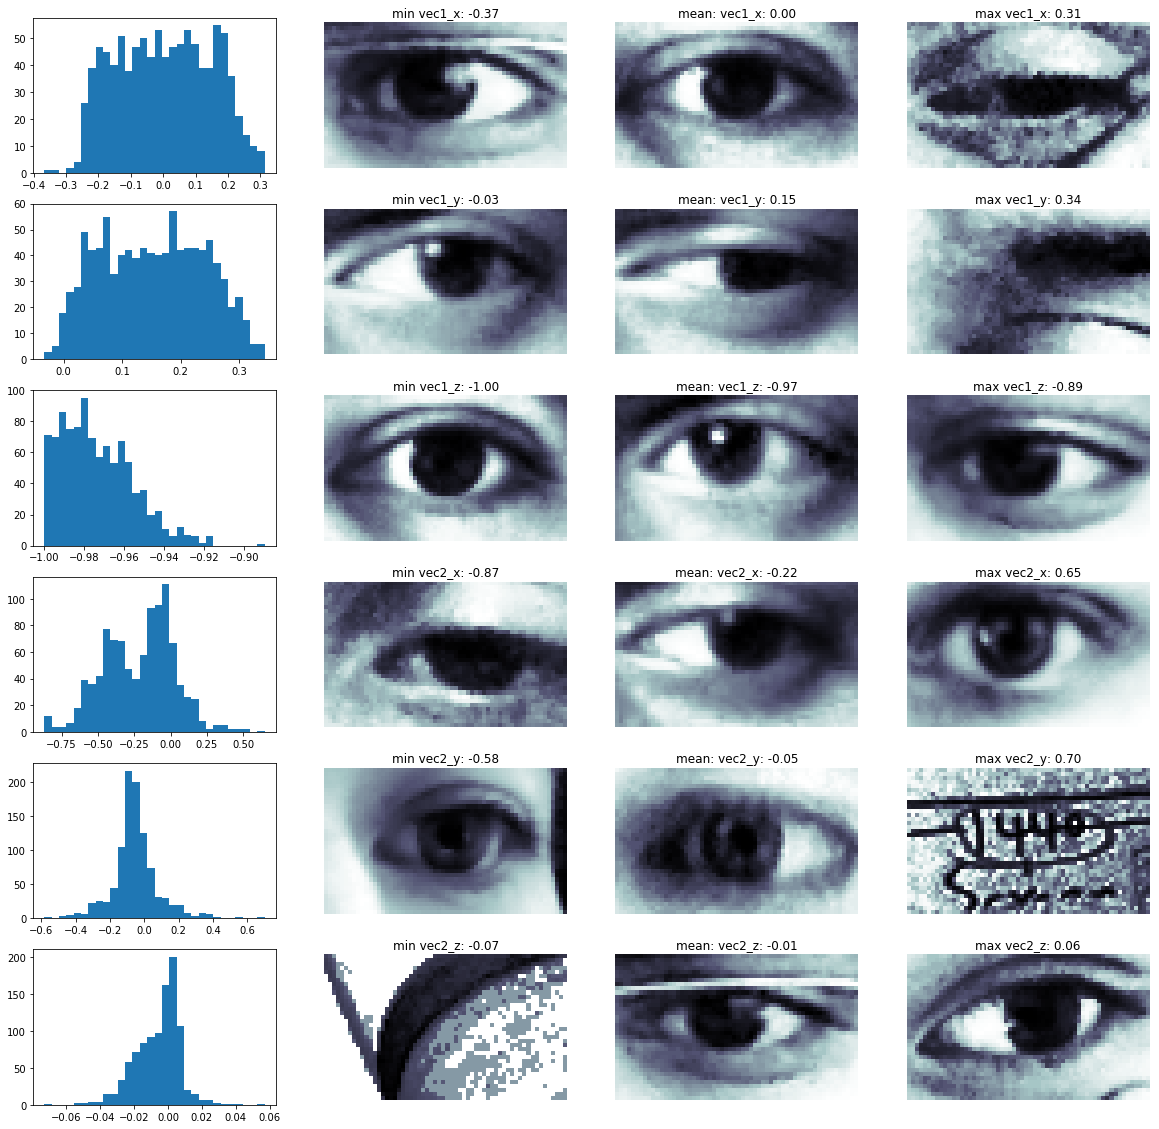

In [ ]:
fig, m_axs = plt.subplots(6, 4, figsize = (20, 20))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
from itertools import product
for (ax_dist, ax_min, ax_mean, ax_max), (v, (i, x)) in zip(m_axs, product(['vec1', 'vec2'], enumerate('xyz'))):
    # use random sampling to get a better feeling
    c_vec = all_norm_df.sample(1000)['{}_{}'.format(v, x)]
    ax_dist.hist(c_vec.values, 30)
    ax_dist.axis('on')
    j = c_vec.idxmin()
    ax_min.imshow(all_norm_df.iloc[j]['img'], cmap = 'bone')
    ax_min.set_title('min {}_{}: {:2.2f}'.format(v, x, all_norm_df.iloc[j]['{}_{}'.format(v, x)]))

    k = c_vec.idxmax()
    ax_max.imshow(all_norm_df.iloc[k]['img'], cmap = 'bone')
    ax_max.set_title('max {}_{}: {:2.2f}'.format(v, x, all_norm_df.iloc[k]['{}_{}'.format(v, x)]))

    p = np.abs(c_vec-np.mean(c_vec)).idxmin()
    ax_mean.imshow(all_norm_df.iloc[p]['img'], cmap = 'bone')
    ax_mean.set_title('mean: {}_{}: {:2.2f}'.format(v, x, all_norm_df.iloc[p]['{}_{}'.format(v, x)]))

In [ ]:
img = all_norm_df.iloc[0]['img']

In [ ]:
from skimage.feature import blob_doh
from skimage.color import rgb2gray


def displayBlob(image, blob, filename):
    h = image.shape[0]
    w = image.shape[1]
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Read in an image and display it on the axis
    ax.imshow(image)
    if len(blob)==0:
        blob=[[h/2,w/2,30]]
    blob = np.mean(blob, axis=0)
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
    # Save the figure
    plt.savefig(filename)
    # close the figure
    plt.close(fig)
    # read the saved file and return the image
    return plt.imread(filename)



def displayBlob(image, blob, filename):
    h = image.shape[0]
    w = image.shape[1]
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Read in an image and display it on the axis
    ax.imshow(image)
    if len(blob)==0:
        blob=[[h/2,w/2,30]]
    blob = np.mean(blob, axis=0)
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
    # Save the figure
    plt.savefig(filename)
    # close the figure
    plt.close(fig)
    # read the saved file and return the image
    return plt.imread(filename)


#image=imread(img)
gray=rgb2gray(img)
print(len(img))
print(len(gray))
mask=gray>0.2
mask_blob=blob_doh(mask, max_sigma=30, min_sigma=5, threshold=.005)
disp_mask_blob=displayBlob(img, mask_blob, "/kaggle/working/gray_blob_{}.png".format(i))
#coor_blob=output_coor_blob(img, mask_blob)

36
36


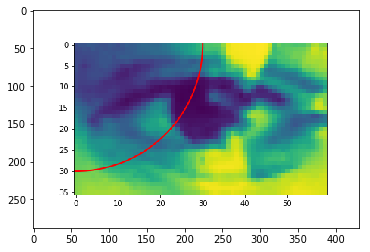

In [ ]:
plt.imshow(disp_mask_blob)

# Functions

In [ ]:
import numpy as np
from skimage.color import rgb2gray
import cv2
import os

from tqdm import tqdm

from matplotlib import pyplot as plt
from matplotlib.image import imread
from matplotlib.patches import Circle
%matplotlib inline

from scipy.ndimage import gaussian_filter
from scipy.ndimage import convolve
from skimage.transform import resize
from skimage.morphology import *
from skimage.feature import blob_doh
from skimage.transform import hough_circle
from skimage.feature import canny
#functions used in edge canny from scratch

def gaussian_smoothing(img):
    smoothed_img = gaussian_filter(img, sigma=5)
    return smoothed_img

def gradient(img):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -1, -2]])
    sobel_x_img = convolve(img, sobel_x, mode='constant')
    sobel_y_img = convolve(img, sobel_y, mode='constant')
    g_magnitude = np.sqrt(sobel_x_img ** 2 + sobel_y_img ** 2)
    g_dir = np.arctan2(sobel_x_img, sobel_y_img)
    return g_magnitude, g_dir

def non_maximum_suppression(g_magnitude, g_dir):
    g_dir[g_dir < 0] += np.pi
    g_dir_hat = np.floor_divide(g_dir, np.pi / 4)
    g_max = np.zeros_like(g_magnitude)
    for x in range(1, g_magnitude.shape[0] - 1):
        for y in range(1, g_magnitude.shape[1] - 1):
            magnitude = g_magnitude[x, y]
            dir_hat = g_dir_hat[x, y]
            if dir_hat == 0:  # east/west
                if np.greater_equal(magnitude, g_magnitude[x, y-1]) and np.greater_equal(magnitude, g_magnitude[x, y+1]):
                    g_max[x, y] = magnitude
            elif dir_hat == 1: #northeast/southwest
                if np.greater_equal(magnitude, g_magnitude[x+1, y-1]) and np.greater_equal(magnitude, g_magnitude[x-1, y+1]):
                    g_max[x, y] = magnitude
            elif dir_hat == 2: #nort/south
                if np.greater_equal(magnitude, g_magnitude[x+1, y]) and np.greater_equal(magnitude, g_magnitude[x-1, y]):
                    g_max[x, y] = magnitude
            elif dir_hat == 3: #nortwest/southeast
                if np.greater_equal(magnitude, g_magnitude[x+1, y+1]) and np.greater_equal(magnitude, g_magnitude[x-1, y-1]):
                    g_max[x, y] = magnitude
    return g_max

def double_thresholding(g_max, thresh_lo, thresh_hi):
    thresh_img = np.zeros_like(g_max)
    for x in range(g_max.shape[0]):
      for y in range(g_max.shape[1]):
          mag = g_max[x, y]
          if mag > thresh_hi:
              thresh_img[x, y] = 255 #strong
          elif mag > thresh_lo:
              thresh_img[x, y] = 128 #weak
    return thresh_img

def connectivity(thresh_img):
    edge_img = np.zeros_like(thresh_img)
    for x in range(thresh_img.shape[0]):
      for y in range(thresh_img.shape[1]):
        edge = thresh_img[x,y]
        if edge == 255:
          edge_img[x,y] = edge
        if edge == 128:
          if thresh_img[x-1,y-1]==255 or thresh_img[x-1,y]==255 or thresh_img[x,y-1]==255 or thresh_img[x+1,y]==255 or thresh_img[x+1,y+1]==255:
            edge_img[x,y] = edge
    return edge_img
# edge canny from scratch

def canny_edge_detector(img, thresh_lo=0.01, thresh_hi=0.04):
    """
    The Canny edge detector.

    Inputs:
        img              The input image
        thresh_lo        The fraction of the maximum gradient magnitude which will
                         be considered the lo threshold.
        thresh_hi        The fraction of the maximum gradient magnitude which will
                         be considered the hi threshold. Ideally should be 2x to 3x
                         thresh_lo.

    Outputs:
        edge_img         A binary image, with pixels lying on edges marked with a 1,
                         and others with a 0.
    """

    # Smooth the image first.
    smoothed             = gaussian_smoothing(img)

    # Find gradient magnitude and direction
    g_magnitude, g_dir   = gradient(smoothed)

    # Non-maximum suppression
    g_max                = non_maximum_suppression(g_magnitude, g_dir)

    # Double thresholding
    thresh_img           = double_thresholding(g_max, thresh_lo, thresh_hi)

    # Final edge connectivity
    edge_img             = connectivity(thresh_img)

    # Return the result
    return edge_img
# detect circles fromm scratch

def detectCircles(img,threshold,region,radius):
    (M,N) = img.shape
    [R_max,R_min] = radius
    R = R_max - R_min
    #Initializing accumulator array.
    #Accumulator array is a 3 dimensional array with the dimensions representing
    #the radius, X coordinate and Y coordinate resectively.
    #Also appending a padding of 2 times R_max to overcome the problems of overflow
    A = np.zeros((R_max,M+2*R_max,N+2*R_max))
    B = np.zeros((R_max,M+2*R_max,N+2*R_max))

    #Precomputing all angles to increase the speed of the algorithm
    theta = np.arange(0,360)*np.pi/180
    edges = np.argwhere(img[:,:])                                               #Extracting all edge coordinates
    for val in range(R):
        r = R_min+val
        #Creating a Circle Blueprint
        bprint = np.zeros((2*(r+1),2*(r+1)))
        (m,n) = (r+1,r+1)                                                       #Finding out the center of the blueprint
        for angle in theta:
            x = int(np.round(r*np.cos(angle)))
            y = int(np.round(r*np.sin(angle)))
            bprint[m+x,n+y] = 1
        constant = np.argwhere(bprint).shape[0]
        for x,y in edges:                                                       #For each edge coordinates
            #Centering the blueprint circle over the edges
            #and updating the accumulator array
            X = [x-m+R_max,x+m+R_max]                                           #Computing the extreme X values
            Y= [y-n+R_max,y+n+R_max]                                            #Computing the extreme Y values
            A[r,X[0]:X[1],Y[0]:Y[1]] += bprint
        A[r][A[r]<threshold*constant/r] = 0

    for r,x,y in np.argwhere(A):
        temp = A[r-region:r+region,x-region:x+region,y-region:y+region]
        try:
            p,a,b = np.unravel_index(np.argmax(temp),temp.shape)
        except:
            continue
        B[r+(p-region),x+(a-region),y+(b-region)] = 1

    return B[:,R_max:-R_max,R_max:-R_max]


def displayCircles(image, coor):
    fig = plt.figure()
    plt.imshow(image)
    circleCoordinates = np.argwhere(coor)                                          #Extracting the circle information
    circle = []
    for r,x,y in circleCoordinates:
        circle.append(plt.Circle((y,x),r,color=(1,0,0),fill=False))
        fig.add_subplot(111).add_artist(circle[-1])
    plt.show()

def mask_image(gray, threshold):
    mask = gray > threshold
    return mask
def dilated_image(image, rep):
  dilated = dilation(image)
  for i in range(rep-1):
    dilated=dilation(dilated)
  return dilated
def NewdisplayCircles(image, coor, filename):
    h = image.shape[0]
    w = image.shape[1]
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Read in an image and display it on the axis
    ax.imshow(image)
    # Create a circle patch with the desired coordinates and radius
    circleCoordinates = np.argwhere(coor)
    circleCoordinates = np.mean(circleCoordinates, axis=0)
    if len(circleCoordinates)==0:
        circleCoordinates=[[1,h/2,w/2]]
    r,y,x = circleCoordinates
    circle = Circle((x,y), r, color='red', fill=False)
    # Add the circle patch to the axis
    ax.add_patch(circle)
    # Save the figure
    plt.savefig(filename)
    # close the figure
    plt.close(fig)
    # read the saved file and return the image
    return plt.imread(filename)
def output_coor_circles(image, coor):
    circleCoordinates = np.argwhere(coor)
    circleCoordinates = np.mean(circleCoordinates, axis=0)
    return circleCoordinates
def displayBlob(image, blob, filename):
    h = image.shape[0]
    w = image.shape[1]
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Read in an image and display it on the axis
    ax.imshow(image)
    if len(blob)==0:
        blob=[[h/2,w/2,30]]
    blob = np.mean(blob, axis=0)
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
    # Save the figure
    plt.savefig(filename)
    # close the figure
    plt.close(fig)
    # read the saved file and return the image
    return plt.imread(filename)
def output_coor_blob(image, blob):
    h = image.shape[0]
    w = image.shape[1]
    if len(blob)==0:
        blob=[[h/2,w/2,30]]
    blob = np.mean(blob, axis=0)
    y, x, r = blob
    return blob

Test

coords circle [17.5 29.5]


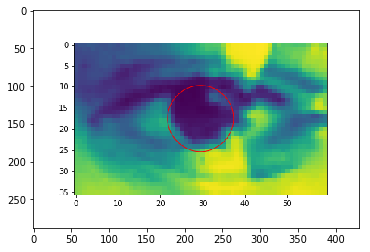

In [ ]:
img = all_norm_df.iloc[0]['img']
#image_reshaped = image[:,:,:-1]
gray=rgb2gray(img)
mask=mask_image(gray,0.3)
dilated_mask=dilated_image(mask, 5)
dilated_mask_edge=canny(dilated_mask, sigma=3, low_threshold=0.2, high_threshold=0.4).astype(np.uint8)
coor_edge_dilated_mask=hough_circle(dilated_mask_edge, np.arange(5, 20))
disp_edge_dilated_mask=NewdisplayCircles(img, coor_edge_dilated_mask, "unity_eye_circle_estimation.png")
coor_circles=output_coor_circles(img, coor_edge_dilated_mask)
plt.imshow(disp_edge_dilated_mask)
print("coords circle", coor_circles[1:3])

In [ ]:
all_norm_df

img    ...       vec2_z
0       [[59, 66, 66, 72, 69, 66, 63, 63, 69, 66, 61, ...    ...     0.007514
1       [[69, 69, 71, 59, 53, 56, 64, 69, 69, 69, 71, ...    ...     0.001516
2       [[72, 73, 67, 63, 60, 56, 60, 60, 56, 67, 67, ...    ...     0.004772
3       [[66, 62, 52, 45, 42, 54, 62, 66, 72, 72, 72, ...    ...     0.004466
4       [[62, 62, 60, 60, 60, 61, 62, 66, 71, 77, 74, ...    ...     0.005699
5       [[63, 73, 71, 59, 51, 59, 70, 65, 63, 73, 79, ...    ...     0.001922
6       [[78, 70, 64, 60, 60, 54, 54, 60, 66, 72, 78, ...    ...     0.003157
7       [[71, 65, 63, 65, 65, 65, 63, 63, 69, 74, 74, ...    ...     0.003424
8       [[32, 34, 38, 41, 44, 57, 72, 78, 80, 76, 78, ...    ...     0.005256
9       [[18, 19, 19, 30, 37, 57, 60, 69, 79, 83, 77, ...    ...     0.002671
10      [[63, 66, 66, 63, 63, 65, 63, 70, 76, 76, 75, ...    ...     0.004095
11      [[26, 30, 35, 37, 45, 49, 57, 64, 72, 80, 81, ...    ...     0.002960
12      [[54, 52, 52, 56, 58, 61, 70, 72, 73, 72, 70, ...    ...     0.006400
13      [[17, 17, 22, 28, 33, 37, 41, 52, 64, 61, 61, ...    ...     0.002773
14      [[35, 40, 54, 64, 62, 58, 62, 71, 77, 76, 66, ...    ...     0.005304
15      [[10, 9, 13, 14, 13, 13, 28, 42, 45, 49, 53, 6...    ...     0.002274
16      [[14, 13, 13, 13, 14, 20, 20, 26, 28, 30, 32, ...    ...     0.000223
17      [[21, 22, 22, 21, 22, 26, 32, 48, 51, 48, 54, ...    ...     0.002072
18      [[6, 6, 4, 5, 7, 9, 14, 24, 31, 37, 37, 27, 33...    ...     0.003900
19      [[23, 20, 16, 13, 13, 16, 16, 13, 12, 12, 11, ...    ...    -0.002269
20      [[57, 54, 57, 60, 65, 69, 81, 86, 81, 81, 86, ...    ...     0.000740
21      [[59, 64, 67, 67, 70, 78, 78, 81, 78, 78, 81, ...    ...    -0.000605
22      [[58, 65, 67, 67, 70, 75, 83, 83, 83, 81, 81, ...    ...    -0.001054
23      [[53, 58, 63, 72, 72, 67, 74, 72, 77, 77, 81, ...    ...     0.004299
24      [[47, 52, 54, 57, 62, 64, 70, 79, 83, 81, 81, ...    ...    -0.003393
25      [[53, 66, 64, 64, 68, 75, 82, 82, 82, 80, 80, ...    ...    -0.002512
26      [[51, 63, 68, 68, 68, 68, 68, 68, 73, 70, 79, ...    ...    -0.003215
27      [[40, 44, 51, 55, 62, 65, 62, 65, 65, 65, 73, ...    ...    -0.004686
28      [[45, 44, 42, 43, 48, 52, 54, 57, 57, 59, 65, ...    ...    -0.005598
29      [[49, 58, 67, 73, 67, 61, 61, 58, 58, 64, 76, ...    ...    -0.003304
...                                                   ...    ...          ...
213626  [[229, 228, 223, 222, 212, 199, 156, 130, 114,...    ...     0.014883
213627  [[234, 230, 226, 222, 216, 219, 218, 211, 206,...    ...     0.005349
213628  [[234, 231, 225, 206, 156, 122, 111, 106, 103,...    ...     0.007649
213629  [[224, 223, 221, 210, 209, 199, 184, 147, 138,...    ...     0.009921
213630  [[250, 247, 247, 247, 235, 232, 231, 231, 222,...    ...     0.002870
213631  [[248, 248, 249, 246, 243, 237, 237, 229, 219,...    ...     0.001572
213632  [[240, 236, 230, 230, 230, 226, 222, 220, 218,...    ...     0.018952
213633  [[111, 132, 83, 60, 50, 52, 50, 50, 53, 60, 10...    ...     0.007400
213634  [[221, 217, 212, 212, 214, 206, 200, 189, 159,...    ...     0.004404
213635  [[8, 4, 3, 2, 3, 2, 1, 2, 3, 4, 7, 8, 2, 1, 2,...    ...    -0.001192
213636  [[41, 50, 33, 21, 13, 11, 18, 28, 50, 41, 28, ...    ...    -0.003140
213637  [[238, 219, 226, 226, 235, 241, 241, 230, 172,...    ...     0.002582
213638  [[178, 114, 48, 16, 13, 13, 11, 11, 11, 13, 19...    ...    -0.011304
213639  [[14, 14, 14, 14, 10, 14, 25, 36, 58, 43, 4, 6...    ...     0.019992
213640  [[194, 224, 246, 220, 164, 136, 117, 65, 39, 3...    ...    -0.004919
213641  [[14, 17, 17, 10, 7, 7, 4, 2, 7, 7, 17, 58, 10...    ...     0.008690
213642  [[81, 45, 45, 18, 27, 27, 10, 2, 5, 15, 12, 12...    ...    -0.007969
213643  [[62, 50, 26, 15, 8, 8, 11, 8, 2, 3, 6, 15, 21...    ...    -0.012755
213644  [[30, 20, 5, 1, 2, 2, 1, 1, 3, 2, 3, 5, 5, 2, ...    ...    -0.016547
213645  [[224, 217, 160, 119, 100, 56, 34, 34, 47, 64,...    ...    -0.00648

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Define paths
BASE_PATH = "/content/MPIIGaze"
DATA_PATH = os.path.join(BASE_PATH, "Data")
ANNOTATION_PATH = os.path.join(BASE_PATH, "Annotation Subset")

# Load a sample image to explore
sample_image_path = os.listdir(DATA_PATH)[0]
sample_image = cv2.imread(os.path.join(DATA_PATH, sample_image_path))

# Use cv2_imshow instead of cv2.imshow
cv2_imshow(sample_image)


AttributeError: ignored

In [ ]:
print(os.path.join(DATA_PATH, sample_image_path))


/content/MPIIGaze/Data/Normalized


In [ ]:
# Update the path to point to the 'Normalized' directory
NORMALIZED_DATA_PATH = os.path.join(DATA_PATH, "Normalized")

# List all files in the 'Normalized' directory
image_files = [f for f in os.listdir(NORMALIZED_DATA_PATH) if f.endswith('.jpg')]

# Check if there are any image files
if image_files:
    sample_image_path = image_files[0]
    sample_image = cv2.imread(os.path.join(NORMALIZED_DATA_PATH, sample_image_path))

    if sample_image is not None:
        cv2_imshow(sample_image)
    else:
        print("Failed to load the image.")
else:
    print("No image files found in the directory.")


No image files found in the directory.


In [ ]:
# List all contents of the 'Normalized' directory
contents = os.listdir(NORMALIZED_DATA_PATH)
print(contents)


['p11', 'p09', 'p04', 'p13', 'p05', 'p08', 'p06', 'p12', 'p07', 'p01', 'p14', 'p03', 'p00', 'p10', 'p02']


In [ ]:
SUB_DIR_PATH = os.path.join(NORMALIZED_DATA_PATH, 'p00')

In [ ]:
SUB_DIR_PATH

'/content/MPIIGaze/Data/Normalized/p00'

In [ ]:
# Choose a subdirectory
SUB_DIR_PATH = os.path.join(NORMALIZED_DATA_PATH, 'p00')

# List all image files in the chosen subdirectory
image_files = [f for f in os.listdir(SUB_DIR_PATH) if any(f.endswith(ext) for ext in ['.jpg', '.png', '.bmp'])]

# If we found any image files, display the first one
if image_files:
    sample_image_path = image_files[0]
    sample_image = cv2.imread(os.path.join(SUB_DIR_PATH, sample_image_path))

    if sample_image is not None:
        cv2_imshow(sample_image)
    else:
        print("Failed to load the image.")
else:
    print("No image files found in the chosen subdirectory.")


No image files found in the chosen subdirectory.


In [ ]:
# Dive deeper into 'p00' directory
contents_p00 = os.listdir(SUB_DIR_PATH)
print(contents_p00)


['day34.mat', 'day31.mat', 'day25.mat', 'day36.mat', 'day30.mat', 'day08.mat', 'day09.mat', 'day10.mat', 'day01.mat', 'day13.mat', 'day03.mat', 'day17.mat', 'day22.mat', 'day04.mat', 'day27.mat', 'day35.mat', 'day11.mat', 'day24.mat', 'day28.mat', 'day05.mat', 'day23.mat', 'day29.mat', 'day33.mat', 'day19.mat', 'day32.mat', 'day18.mat', 'day38.mat', 'day26.mat', 'day06.mat', 'day07.mat', 'day02.mat', 'day20.mat', 'day12.mat', 'day21.mat', 'day14.mat', 'day16.mat', 'day37.mat', 'day39.mat', 'day15.mat']


In [ ]:
from PIL import Image
import os
import random

BASE_PATH = "/content/MPIIGaze/Data/Original"
participants = ['p{:02d}'.format(i) for i in range(15)]  # ['p00', 'p01', ..., 'p14']

# Store all images and their paths in lists
all_images = []
all_image_paths = []

for participant in participants:
    participant_path = os.path.join(BASE_PATH, participant)

    # Get all 'day' folders for the participant
    day_folders = [d for d in os.listdir(participant_path) if d.startswith('day')]

    for day in day_folders:
        day_path = os.path.join(participant_path, day)

        # Get all image files in the 'day' folder
        image_files = [f for f in os.listdir(day_path) if f.endswith('.jpg')]

        # Shuffle the list and select 20% of the images
        random.shuffle(image_files)
        selected_images = image_files[:int(0.2 * len(image_files))]

        for image_file in selected_images:
            image_path = os.path.join(day_path, image_file)
            image = Image.open(image_path)

            all_images.append(image)
            all_image_paths.append(image_path)

# Check the number of images loaded and display the first image as a test
print(f"Loaded {len(all_images)} images.")
if all_images:
    all_images[0].show()  # Display using the show() method of Pillow


Loaded 42595 images.


In [ ]:
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
image_height = 128
image_width = 128


In [ ]:
# Resizing, Normalization, and Augmentation using ImageDataGenerator
data_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2
)


In [ ]:
# Divide the data into smaller batches
batch_size = 32
num_batches = len(all_images) // batch_size
remainder = len(all_images) % batch_size

preprocessed_batches = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch_images = all_images[start_idx:end_idx]

    preprocessed_batch = []
    for image in batch_images:
        image = image.resize((image_width, image_height))
        preprocessed_batch.append(image)

    preprocessed_batches.append(preprocessed_batch)

# Handle the remainder batch
if remainder > 0:
    remainder_images = all_images[-remainder:]
    preprocessed_remainder = []
    for image in remainder_images:
        image = image.resize((image_width, image_height))
        preprocessed_remainder.append(image)
    preprocessed_batches.append(preprocessed_remainder)


In [ ]:
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
image_height = 128
image_width = 128

# Define data generator for preprocessing and augmentation
data_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2
)

# Convert your list of images to an array (if not already)
all_images_array = np.array(all_images)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images_array, all_gaze_labels, test_size=0.2, random_state=42)

# Create generators for training and validation data with preprocessing
train_generator = data_generator.flow(X_train, y_train, batch_size=batch_size)
val_generator = data_generator.flow(X_val, y_val, batch_size=batch_size)


KeyboardInterrupt: ignored

In [ ]:


# Define image dimensions
image_height = 128
image_width = 128

# Resizing, Normalization, and Augmentation using ImageDataGenerator
data_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2
)

# Divide the data into smaller batches
batch_size = 32
num_batches = len(all_images) // batch_size
remainder = len(all_images) % batch_size

preprocessed_batches = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch_images = all_images[start_idx:end_idx]

    preprocessed_batch = []
    for image in batch_images:
        image = image.resize((image_width, image_height))
        preprocessed_batch.append(image)

    preprocessed_batches.append(preprocessed_batch)



In [ ]:
# Handle the remainder batch
if remainder > 0:
    remainder_images = all_images[-remainder:]
    preprocessed_remainder = []
    for image in remainder_images:
        image = image.resize((image_width, image_height))
        preprocessed_remainder.append(image)
    preprocessed_batches.append(preprocessed_remainder)

# Split data into training and validation sets
# Note: You'll need to adjust this part to split the labels accordingly
X_train_batches, X_val_batches = train_test_split(preprocessed_batches, test_size=0.2, random_state=42)

# Create generators for training and validation data
train_generators = [data_generator.flow(batch, batch_size=batch_size) for batch in X_train_batches]
val_generators = [data_generator.flow(batch, batch_size=batch_size) for batch in X_val_batches]


In [ ]:
!pip install scikit-image



In [ ]:
%matplotlib inline
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import keras
import keras.backend as K
data_dir = os.path.join('..', 'input')
norm_stack = lambda x: np.clip((x-127.0)/127.0, -1, 1)
def norm_stack(x):
    # calculate statistics on first 20 points
    mean = np.mean(x[:20])
    std = np.std(x[:20])
    return (1.0*x-mean)/(2*std)

In [ ]:
!pip install --upgrade h5py


In [ ]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
from skimage.util.montage import montage2d

# Define the normalization function
def norm_stack(x):
    mean = np.mean(x[:20])
    std = np.std(x[:20])
    return (1.0 * x - mean) / (2 * std)

# Define the file path
data_file_path = '/content/real_gaze.h5'

# Load the data file and extract dimensions
with h5py.File(data_file_path, 'r') as t_file:
    print(list(t_file.keys()))
    assert 'image' in t_file, "Images are missing"
    print('Images found:', len(t_file['image']))

    for _, (ikey, ival) in zip(range(1), t_file['image'].items()):
        print('image', ikey, 'shape:', ival.shape)
        img_width, img_height = ival.shape

    real_image_stack = norm_stack(np.expand_dims(np.stack([a for a in t_file['image'].values()], 0), -1))
    print(real_image_stack.shape, 'loaded')

# Display the montage of images
plt.matshow(montage2d(real_image_stack[0:9, :, :, 0]), cmap='gray')


ModuleNotFoundError: ignored

In [ ]:
!pip install -qq git+https://www.github.com/keras-team/keras-contrib.git

  Preparing metadata (setup.py) ... done


In [ ]:
import scipy
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D

from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

In [ ]:
class CycleGAN():
    def __init__(self, img_rows, img_cols, channels_A, channels_B):
        # Input shape
        self.img_rows = img_rows
        self.img_cols = img_cols
        self.channels_A = channels_A
        self.channels_B = channels_B
        self.img_shape_A = (self.img_rows, self.img_cols, self.channels_A)
        self.img_shape_B = (self.img_rows, self.img_cols, self.channels_B)
        # Calculate output shape of D (PatchGAN)
        patch_r = int(self.img_rows / 2**4)
        patch_c = int(self.img_cols / 2**4)
        self.disc_patch = (patch_r, patch_c, 1)

        # Number of filters in the first layer of G and D
        self.gf = 32
        self.df = 64

        # Loss weights
        self.lambda_cycle = 10.0                    # Cycle-consistency loss
        self.lambda_id = 0.1 * self.lambda_cycle    # Identity loss

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminators
        self.d_A = self.build_discriminator(self.img_shape_A)
        self.d_B = self.build_discriminator(self.img_shape_B)
        self.d_A.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.d_B.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])

        #-------------------------
        # Construct Computational
        #   Graph of Generators
        #-------------------------

        # Build the generators
        self.g_AB = self.build_generator(self.img_shape_A, self.img_shape_B)
        self.g_BA = self.build_generator(self.img_shape_B, self.img_shape_A)

        # Input images from both domains
        img_A = Input(shape=self.img_shape_A, name='ImageA')
        img_B = Input(shape=self.img_shape_B, name='ImageB')

        # Translate images to the other domain
        fake_B = self.g_AB(img_A)
        fake_A = self.g_BA(img_B)
        # Translate images back to original domain
        reconstr_A = self.g_BA(fake_B)
        reconstr_B = self.g_AB(fake_A)
        # Identity mapping of images
        img_A_id = self.g_BA(img_B)
        img_B_id = self.g_AB(img_A)

        # For the combined model we will only train the generators
        self.d_A.trainable = False
        self.d_B.trainable = False

        # Discriminators determines validity of translated images
        valid_A = self.d_A(fake_A)
        valid_B = self.d_B(fake_B)

        # Combined model trains generators to fool discriminators
        self.combined = Model(inputs=[img_A, img_B],
                              outputs=[ valid_A, valid_B,
                                        reconstr_A, reconstr_B,
                                        img_A_id, img_B_id ])
        self.combined.compile(loss=['mse', 'mse',
                                    'mae', 'mae',
                                    'mae', 'mae'],
                            loss_weights=[  1, 1,
                                            self.lambda_cycle, self.lambda_cycle,
                                            self.lambda_id, self.lambda_id ],
                            optimizer=optimizer)

    def build_generator(self, in_img_shape, out_img_shape):
        """U-Net Generator"""

        def conv2d(layer_input, filters, f_size=4):
            """Layers used during downsampling"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            d = InstanceNormalization()(d)
            return d

        def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
            """Layers used during upsampling"""
            u = UpSampling2D(size=2)(layer_input)
            u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u)
            if dropout_rate:
                u = Dropout(dropout_rate)(u)
            u = InstanceNormalization()(u)
            u = Concatenate()([u, skip_input])
            return u

        # Image input
        d0 = Input(shape=in_img_shape)

        # Downsampling
        d1 = conv2d(d0, self.gf)
        d2 = conv2d(d1, self.gf*2)
        d3 = conv2d(d2, self.gf*4)
        d4 = conv2d(d3, self.gf*8)

        # Upsampling
        u1 = deconv2d(d4, d3, self.gf*4)
        u2 = deconv2d(u1, d2, self.gf*2)
        u3 = deconv2d(u2, d1, self.gf)

        u4 = UpSampling2D(size=2)(u3)
        output_img = Conv2D(out_img_shape[-1], kernel_size=4, strides=1, padding='same', activation='tanh')(u4)

        return Model(d0, output_img, name='Gen_{}_{}_{}-{}'.format(*in_img_shape, out_img_shape[-1]))

    def build_discriminator(self, img_shape):

        def d_layer(layer_input, filters, f_size=4, normalization=True):
            """Discriminator layer"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if normalization:
                d = InstanceNormalization()(d)
            return d

        img = Input(shape=img_shape)

        d1 = d_layer(img, self.df, normalization=False)
        d2 = d_layer(d1, self.df*2)
        d3 = d_layer(d2, self.df*4)
        d4 = d_layer(d3, self.df*8)

        validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)

        return Model(img, validity, name='Disc_{}_{}_{}'.format(*img_shape))

In [ ]:
from keras.layers import Input, Conv2D, LeakyReLU  # Import LeakyReLU

In [ ]:
cg = CycleGAN(32, 64, 3, 1)

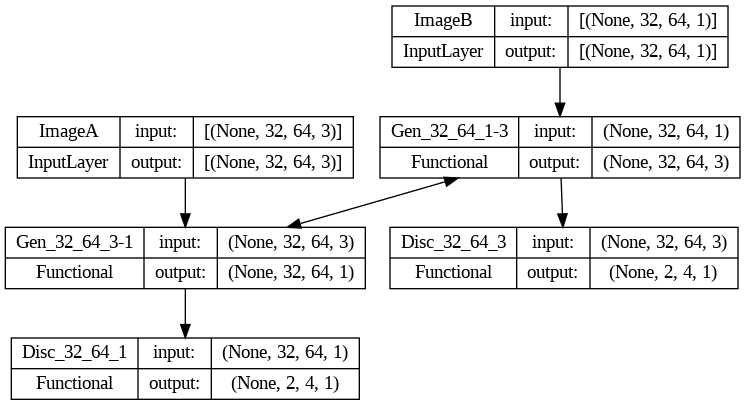

In [ ]:
Image(model_to_dot(cg.combined, show_shapes=True).create_png())

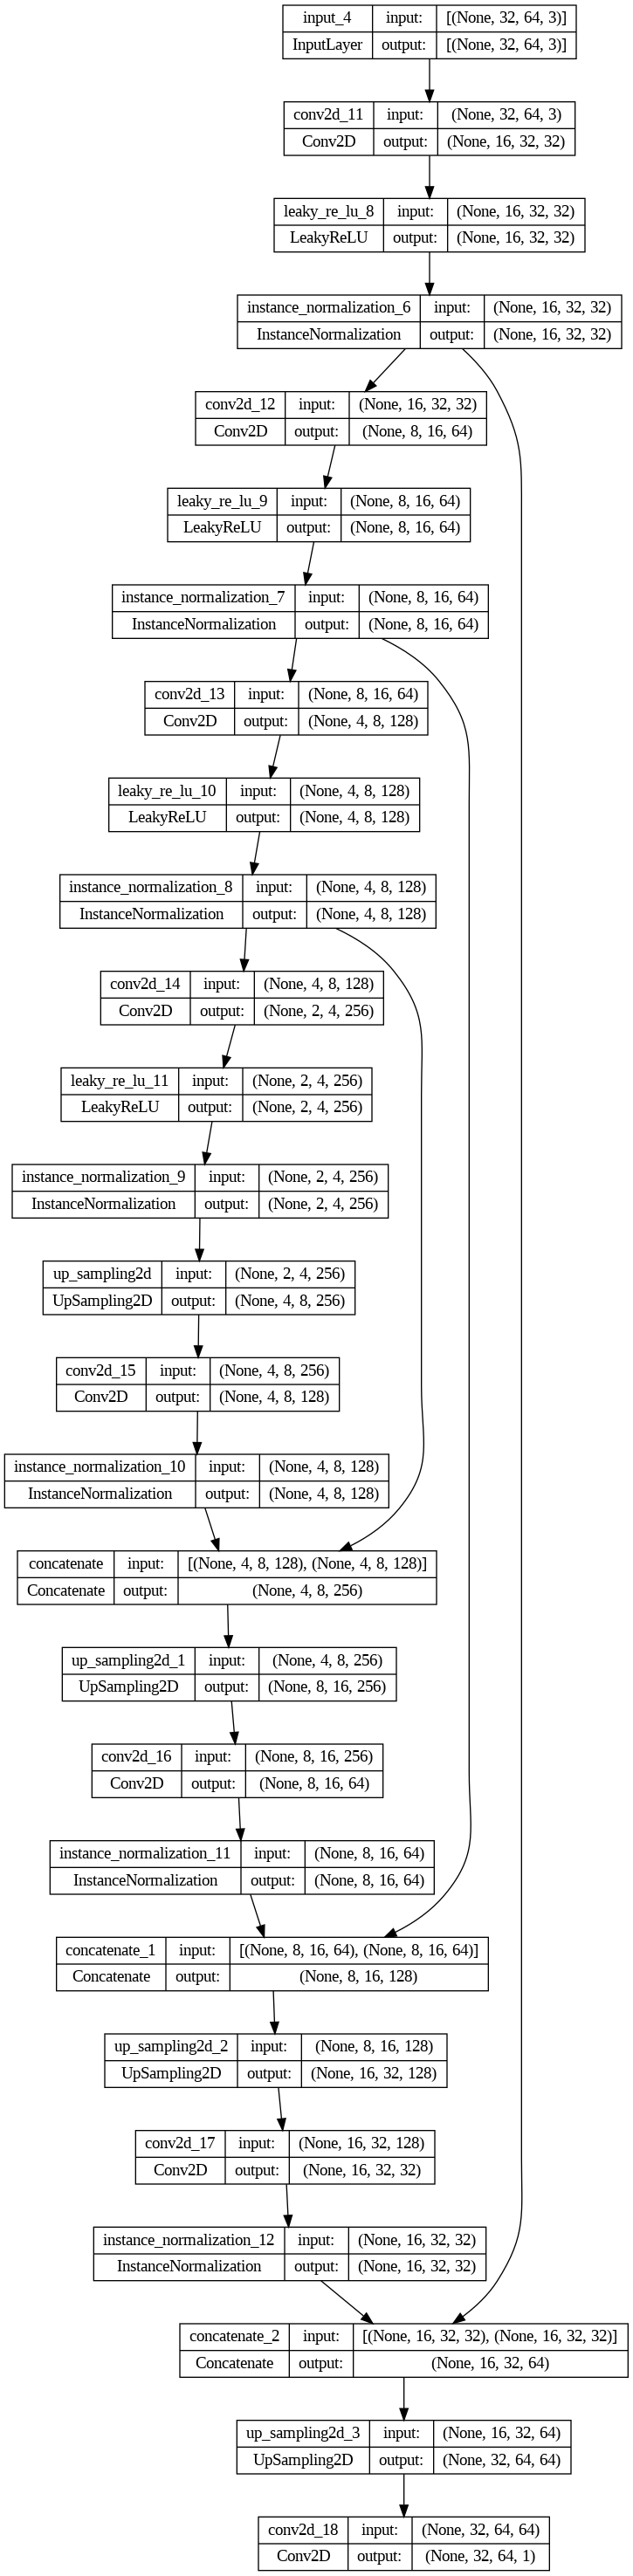

In [ ]:
Image(model_to_dot(cg.g_AB, show_shapes=True).create_png())

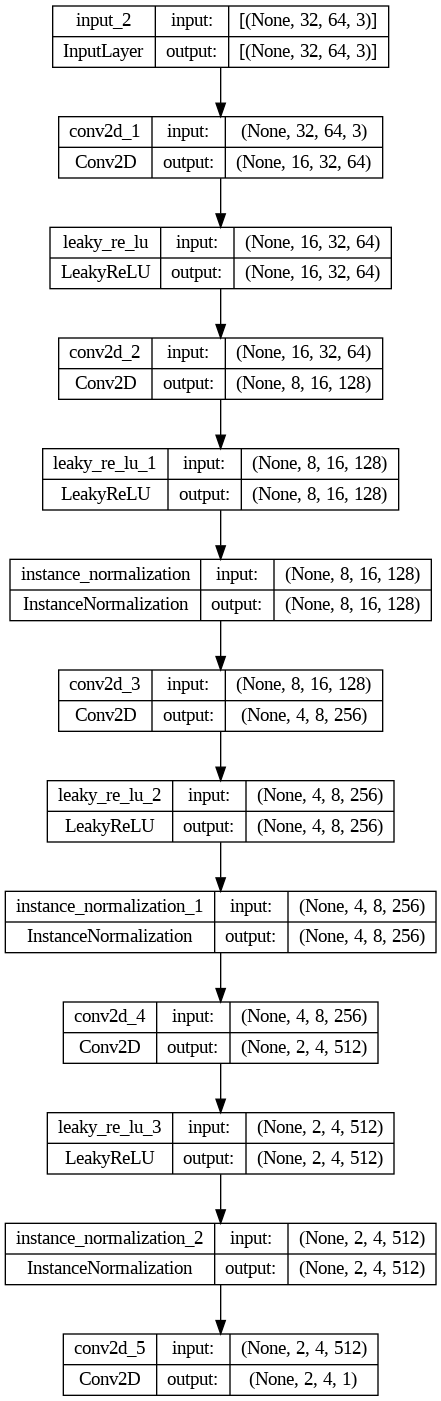

In [ ]:
Image(model_to_dot(cg.d_A, show_shapes=True).create_png())

In [ ]:
import h5py
from skimage.util import montage as montage2d
norm_stack = lambda x: np.clip((x-127.0)/127.0, -1, 1)
def norm_stack(x):
    # calculate statistics on first 20 points
    mean = np.mean(x[:20])
    std = np.std(x[:20])
    return (1.0*x-mean)/(2*std)

In [ ]:
data_dir = os.path.join('..', 'input', 'eye-gaze')
helen_eye_dir = '../input/getting-all-the-eye-balls/'

In [ ]:
# load the data file and extract dimensions
with h5py.File(os.path.join(data_dir,'gaze.h5'),'r') as t_file:
    print(list(t_file.keys()))
    assert 'image' in t_file, "Images are missing"
    assert 'look_vec' in t_file, "Look vector is missing"
    look_vec = t_file['look_vec'][()]
    assert 'path' in t_file, "Paths are missing"
    print('Images found:',len(t_file['image']))
    for _, (ikey, ival) in zip(range(1), t_file['image'].items()):
        print('image',ikey,'shape:',ival.shape)
        img_width, img_height = ival.shape
    syn_image_stack = norm_stack(np.expand_dims(np.stack([a for a in t_file['image'].values()],0), -1))
    print(syn_image_stack.shape, 'loaded')
plt.matshow(montage2d(syn_image_stack[0:9, :, :, 0]), cmap = 'gray')

FileNotFoundError: ignored